POST MODELING

In [3]:
library(caret) # import this before glmnet to avoid rlang version problem
library(data.table)
library(tidyverse)
library(lubridate)

library(ggplot2)
library(ggExtra)
library(gridExtra)
library(pROC)
library(ROCR)
library(ROCit)
library(boot)

library(cvAUC)
library(MLmetrics)
library(cowplot)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'boot'


The following object is masked from 'package:ROCit':

    logit


The following object is masked from 'package:survival':

    aml


The following object is masked from 'package:lattice':

    melanoma


 

cvAUC version: 1.1.0

Notice to cvAUC users: Major speed improvements in version 1.1.0

 


Attaching package: 'MLmetrics'


The following object is masked from 'package:cvAUC':

    AUC


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall


Warning message:
"package 'cowplot' was built under R version 4.0.5"

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




In [4]:
# directories
# ORIGINAL DATA
datadir0 = "../../DataTD/"
cohortdir0 = "../../OutputTD/1_cohort"
featuredir0 = "../../OutputTD/2_features"
modeldir0 = "../../OutputTD/3_models/1_4_cohort"

# VALIDATION NEW DATA 
datadir6 = "../../DataTD/validation"
valdir = "../../OutputTD/6_validation"
modeldir6 = "../../OutputTD/6_validation/models"

# ALL NEW DATA
datadir = "../../DataTD/shc2021"
outdir = "../../OutputTD/shc2021"
modeldir = "../../OutputTD/shc2021/models" # new split new data
modeldir2 = "../../OutputTD/shc2021/models2" # old split new data
figuredir = "../../OutputTD/shc2021/figures"

# ALL FIGURES
Figuredir = "../../OutputTD/Figures"

# display rows and cols
options(repr.matrix.max.rows=250, repr.matrix.max.cols=30)

In [35]:
results0 <- read.csv(file.path(modeldir0, '1_4_cohort_test_results.csv'))
nrow(results0)
results6 <- read.csv(file.path(valdir, '6_7_cohort4_test.csv'))
nrow(results6)

results2 <- read.csv(file.path(outdir, '14_cohort_noOR_final_test2.csv'))
nrow(results2)
results <- read.csv(file.path(outdir, '14_cohort_noOR_final_test.csv'))
nrow(results)

[1] 12418

[1] 16484

[1] 14277

[1] 7759

### CI for area under PRC, had to do on personal laptop because couldn't install a package
install.packages("remotes")

library(remotes)

install_version("MRIaggr", "1.1.5")

library(MRIaggr)

install.packages("pracma", repos="http://R-Forge.R-project.org")

prfpr = ROCR::performance(ROCR::prediction(dfpreds$SLpred, dfpreds$TDDhilo), x.measure = "rec", measure = "prec")

print(prfpr)

calcAUPRC(performance = prfpr)
    AUPRC    IC_inf    IC_sup 
    
0.6470118 0.6307143 0.6629744 

calcAUPRC(performance = prfpr, subdivisions = 10000, method="integrate")
    
>    AUPRC    IC_inf    IC_sup 

> 0.6468168 0.6305175 0.6627816 

Weight only
AUPRC    IC_inf    IC_sup 
0.2804687 0.2200213 0.3500694 

In [14]:
pred_rocr = ROCR::prediction(df$SLpred, df$TDDhilo)
pr = ROCR::performance(pred_rocr, "prec", "rec")
# perf <- performance(pred,"tpr","fpr")
# precision/recall curve (x-axis: recall, y-axis: precision)

Threshold <- pr@alpha.values[[1]]
Recall <- pr@x.values[[1]] # Recall values
Precision <- pr@y.values[[1]] # Precision values

prc = ROCR::performance(pred_rocr, measure = "aucpr", x.measure = "cutoff")@y.values[[1]]
dfpr <- data.frame(Threshold, Recall, Precision)[2:3370,]
head(dfpr)
tail(dfpr)
nrow(dfpr)

,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
2,0.9717322,0.001259446,1
3,0.9359846,0.002518892,1
4,0.9282409,0.003778338,1
5,0.9258461,0.005037783,1
6,0.9191379,0.006297229,1
7,0.9115852,0.007556675,1


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
3365,0.01247367,1,0.2360285
3366,0.01218628,1,0.2359584
3367,0.01185858,1,0.2358883
3368,0.01053362,1,0.2358182
3369,0.01047822,1,0.2357482
3370,0.01021367,1,0.2356782


[1] 3369

In [181]:
r1 <- ROCR::performance(pred_rocr,"f")
str(r1)
mean(r1@y.values[[1]], na.rm =T)

Precision1 <- c(0.5454, 0.6000, 0.9130, 0.9523)
Recall1 <- c(0.0002, 0.0210, 0.0018, 0.0530)
Fscore_rev <- 2 * Precision1 * Recall1 / (Precision1 + Recall1)
round(Fscore_rev, 4)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "Cutoff"
  ..@ y.name      : chr "Precision-Recall F measure"
  ..@ alpha.name  : chr "none"
  ..@ x.values    :List of 1
  .. ..$ : num [1:3370] Inf 0.972 0.936 0.928 0.926 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:3370] NaN 0.00252 0.00503 0.00753 0.01003 ...
  ..@ alpha.values: list()


[1] 0.4977188

[1] 0.0004 0.0406 0.0036 0.1004

In [18]:
str(pr)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "Recall"
  ..@ y.name      : chr "Precision"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:3370] 0 0.00126 0.00252 0.00378 0.00504 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:3370] NaN 1 1 1 1 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:3370] Inf 0.972 0.936 0.928 0.926 ...


In [108]:
str(ROC.perf)
head(ROC.perf@x.values[[1]])

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "False positive rate"
  ..@ y.name      : chr "True positive rate"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:3370] 0 0 0 0 0 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:3370] 0 0.00126 0.00252 0.00378 0.00504 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:3370] Inf 0.972 0.936 0.928 0.926 ...


[1] 0 0 0 0 0 0

In [116]:
length(ROC.perf@x.values[[1]])
length(ROC.perf@y.values[[1]])
length(ROC.perf@alpha.values[[1]])

[1] 3370

[1] 3370

[1] 3370

[1] 3370

FPR,TPR,Threshold
0,0.000000000,Inf
0,0.001259446,0.9717322
0,0.002518892,0.9359846
0,0.003778338,0.9282409
0,0.005037783,0.9258461
0,0.006297229,0.9191379


[1] 3369

,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0,0.001259446,0.9717322
2,0,0.002518892,0.9359846
3,0,0.003778338,0.9282409
4,0,0.005037783,0.9258461
5,0,0.006297229,0.9191379
6,0,0.007556675,0.9115852


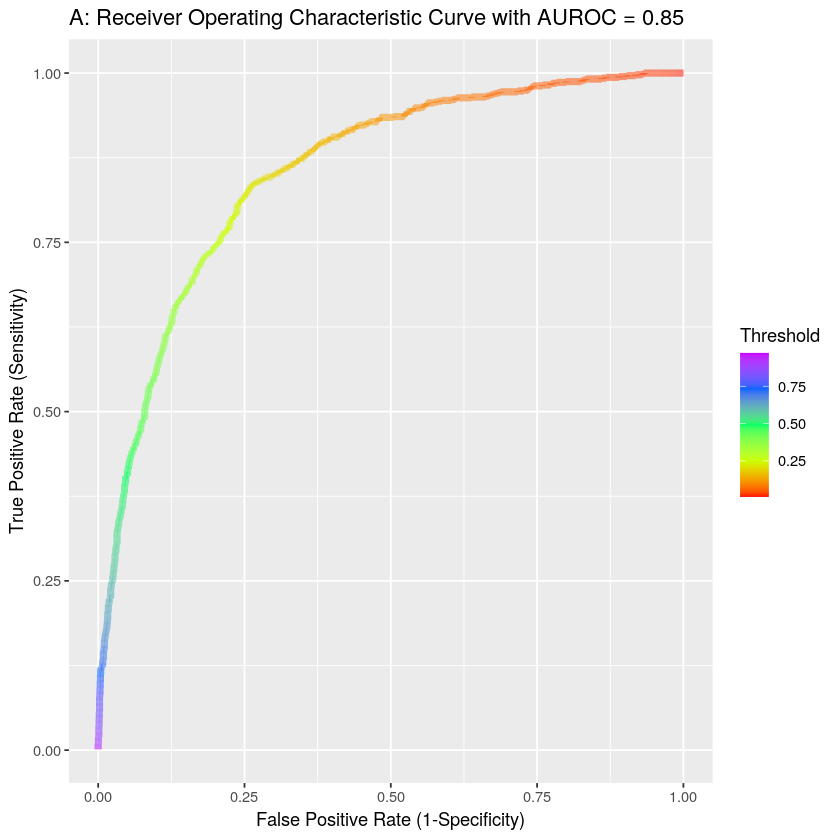

In [17]:
FPR = ROC.perf@x.values[[1]]
TPR= ROC.perf@y.values[[1]]
Threshold = ROC.perf@alpha.values[[1]]
dfroc <- cbind(FPR,TPR,Threshold)
nrow(dfroc)
head(dfroc)
dfroc <- data.frame(dfroc[2: nrow(dfroc), ])
nrow(dfroc)
head(dfroc)

ggplot(dfroc, aes(FPR, TPR, color=Threshold)) + 
    geom_line(size = 2, alpha = 0.7) +
    labs(x = "False Positive Rate (1-Specificity)", 
         y = "True Positive Rate (Sensitivity)", 
         colour="Threshold", title="A: Receiver Operating Characteristic Curve with AUROC = 0.85") + scale_color_gradientn(colours = rainbow(5))

Warning message:
“Removed 2767 row(s) containing missing values (geom_path).”


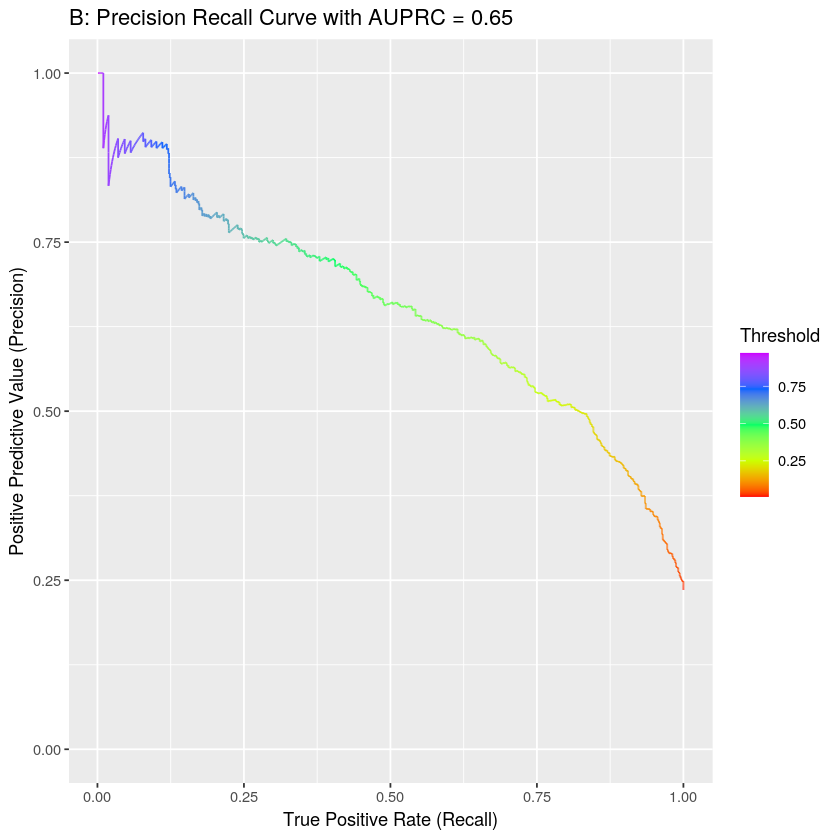

Warning message:
“Removed 656 row(s) containing missing values (geom_path).”


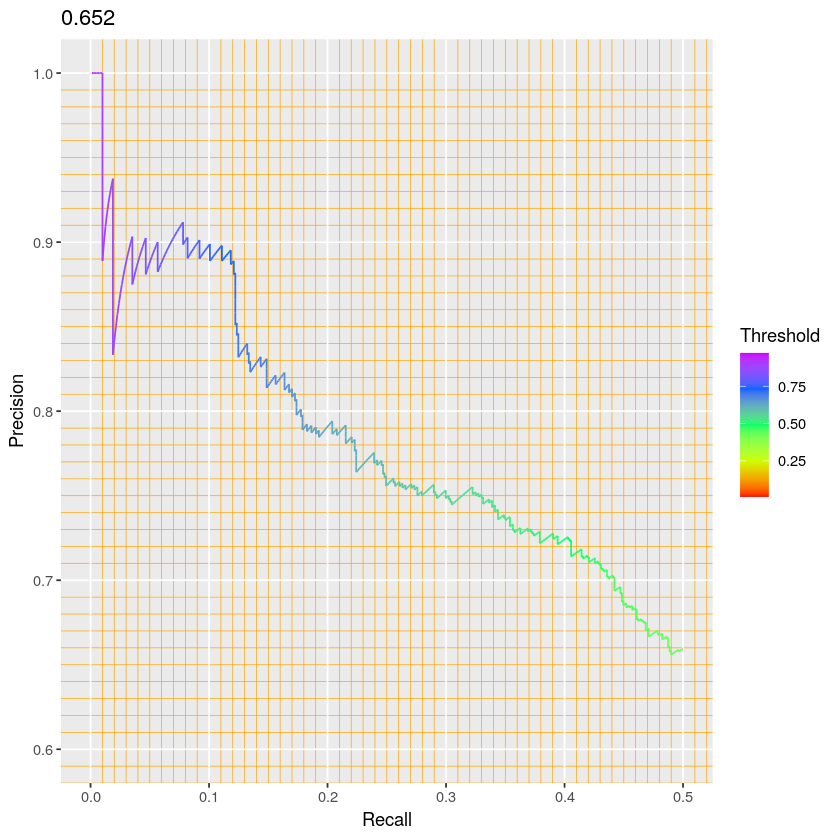

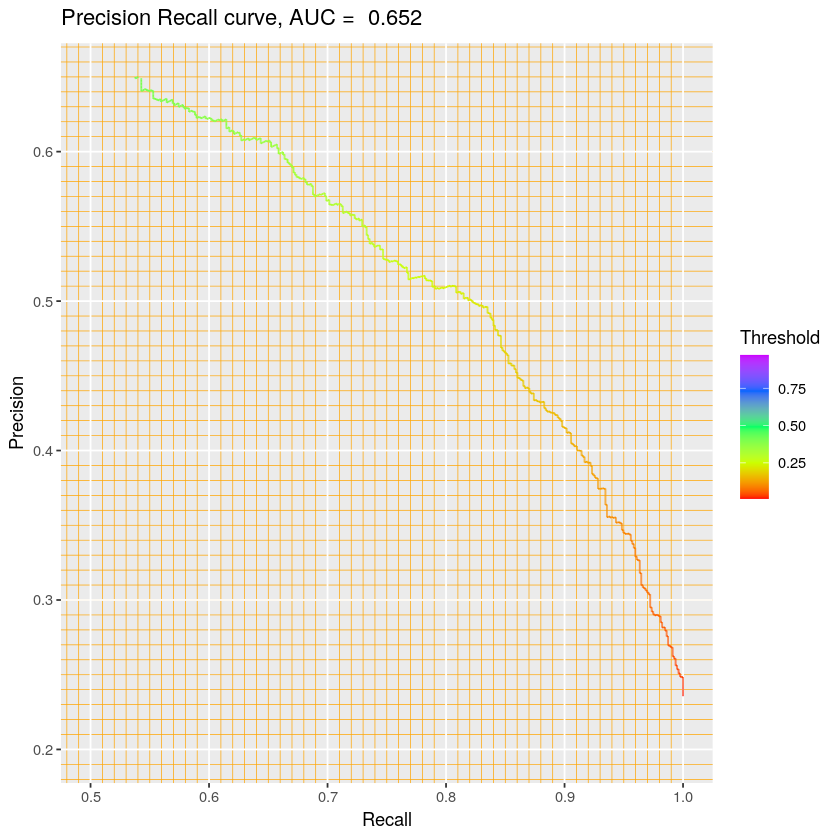

In [21]:
ggplot(dfpr, aes(x = Recall, y = Precision, color=Threshold)) + geom_line() + ylim(0,1) + 
    labs(x="True Positive Rate (Recall)", y="Positive Predictive Value (Precision)", 
         title="B: Precision Recall Curve with AUPRC = 0.65", colour="Threshold") + #title= format(prc,digits=3)
    scale_color_gradientn(colours = rainbow(5))

ggplot(dfpr, aes(x = Recall, y = Precision, color=Threshold)) + geom_line() + 
    labs(x="Recall",y="Precision", title= format(prc,digits=3), colour="Threshold") + # "Precision Recall curve"  
    theme(panel.grid.minor = element_line(colour="orange", size=0.2)) + 
    scale_y_continuous(minor_breaks = seq(0, 1, by = 0.01), limits = c(0.6,1)) +
    scale_x_continuous(minor_breaks = seq(0, 1, by= 0.01) , limits = c(0, 0.5)) + #+ ylim(0.6, 1)
    scale_color_gradientn(colours = rainbow(5))
#     scale_colour_gradient2(low="red", mid="orange", high="yellow")
#      scale_fill_gradientn(colours = terrain.colors(3))
#      scale_colour_gradient2(low="steelblue", high="black")


ggplot(dfpr, aes(x = Recall, y = Precision, color=Threshold)) + geom_line() + 
    labs(x="Recall",y="Precision", title= bquote("Precision Recall curve, AUC = " ~ .(format(prc,digits=3))), colour="Threshold") + # "Precision Recall curve"  
    theme(panel.grid.minor = element_line(colour="orange", size=0.2)) + 
    scale_y_continuous(minor_breaks = seq(0, 1, by = 0.01), limits = c(0.2, 0.65)) +
    scale_x_continuous(minor_breaks = seq(0, 1, by= 0.01) , limits = c(0.5,1)) + #+ ylim(0.2, 0.65) +
    scale_color_gradientn(colours = rainbow(5))
#     scale_colour_gradient2(low="red", mid="orange", high="yellow")
#      scale_fill_gradientn(colours = terrain.colors(3))
#      scale_colour_gradient2(low="steelblue", high="black")


In [173]:
# high Spec --> low FPR --> low sens = low recall --> high precision
head(dfpr %>% filter(round(Recall,2) < 0.20) %>% arrange(Threshold))
head(dfpr %>% filter(round(Recall,2) < 0.20) %>% arrange(desc(Recall)))

head(dfroc %>% filter(round(TPR,2) < 0.20) %>% arrange(desc(Threshold)))
head(dfroc %>% filter(round(TPR,2) < 0.20) %>% arrange(FPR))

head(dfpr %>% filter(round(Threshold,2) >= 0.75) %>% arrange(desc(Recall)))
# head(dfpr %>% filter(round(Threshold,2) >= 0.75) %>% arrange((Precision)))

# head(dfroc %>% filter(round(Threshold,2) < 0.75) %>% arrange(TPR))
head(dfroc %>% filter(round(Threshold,2) >= 0.75) %>% arrange(desc(TPR)))

head(dfroc %>% filter(round(FPR,3) <= 0.195) %>% arrange(Threshold))
head(dfroc %>% filter(round(Threshold,3) <= 0.295) %>% arrange(FPR))
head(dfpr %>% filter(round(Threshold,3) <= 0.295) %>% arrange(desc(Precision)))

head(dfroc %>% filter(round(FPR,3) <= 0.095) %>% arrange(Threshold))
head(dfpr %>% filter(round(Threshold,3) <= 0.4) %>% arrange(desc(Precision)))
head(dfroc %>% filter(round(FPR,3) <= 0.095) %>% arrange(desc(TPR)))


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
1,0.6346480,0.1939547,0.7857143
2,0.6348782,0.1926952,0.7846154
3,0.6353704,0.1926952,0.7886598
4,0.6356915,0.1914358,0.7875648
5,0.6359176,0.1901763,0.7864583
6,0.6376164,0.1901763,0.7905759


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
1,0.6346480,0.1939547,0.7857143
2,0.6353704,0.1926952,0.7886598
3,0.6348782,0.1926952,0.7846154
4,0.6356915,0.1914358,0.7875648
5,0.6376164,0.1901763,0.7905759
6,0.6359176,0.1901763,0.7864583


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0,0.001259446,0.9717322
2,0,0.002518892,0.9359846
3,0,0.003778338,0.9282409
4,0,0.005037783,0.9258461
5,0,0.006297229,0.9191379
6,0,0.007556675,0.9115852


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0,0.001259446,0.9717322
2,0,0.002518892,0.9359846
3,0,0.003778338,0.9282409
4,0,0.005037783,0.9258461
5,0,0.006297229,0.9191379
6,0,0.007556675,0.9115852


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
1,0.7471975,0.10327456,0.8913043
2,0.7475316,0.10201511,0.8901099
3,0.7484664,0.10075567,0.8988764
4,0.7475756,0.10075567,0.8888889
5,0.7501748,0.09949622,0.8977273
6,0.7518320,0.09823678,0.8965517


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0.003883495,0.10327456,0.7471975
2,0.003883495,0.10201511,0.7475316
3,0.003495146,0.10075567,0.7484664
4,0.003883495,0.10075567,0.7475756
5,0.003495146,0.09949622,0.7501748
6,0.003495146,0.09823678,0.7518320


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0.1953398,0.7380353,0.2821406
2,0.1949515,0.7380353,0.2821747
3,0.1945631,0.7380353,0.2822656
4,0.1945631,0.7367758,0.2834209
5,0.1945631,0.7355164,0.2836539
6,0.1941748,0.7355164,0.2841229


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0.1794175,0.7254408,0.2951701
2,0.1794175,0.7267003,0.2949383
3,0.1798058,0.7267003,0.2947134
4,0.1801942,0.7267003,0.2946148
5,0.1805825,0.7267003,0.2938764
6,0.1805825,0.7279597,0.2937888


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
1,0.2949383,0.7267003,0.5553417
2,0.2951701,0.7254408,0.5549133
3,0.2947134,0.7267003,0.5548077
4,0.2935035,0.7292191,0.5545977
5,0.2946148,0.7267003,0.5542747
6,0.2937888,0.7279597,0.5541707


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0.09514563,0.5516373,0.4024260
2,0.09514563,0.5503778,0.4024651
3,0.09514563,0.5491184,0.4025771
4,0.09475728,0.5491184,0.4030419
5,0.09475728,0.5478589,0.4034635
6,0.09436893,0.5478589,0.4038273


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
1,0.3966531,0.5642317,0.6354610
2,0.4000741,0.5554156,0.6354467
3,0.3983652,0.5591940,0.6351931
4,0.3989285,0.5566751,0.6350575
5,0.3969643,0.5629723,0.6349432
6,0.4002329,0.5541562,0.6349206


,FPR,TPR,Threshold
,<dbl>,<dbl>,<dbl>
1,0.09514563,0.5516373,0.4024260
2,0.09514563,0.5503778,0.4024651
3,0.09475728,0.5491184,0.4030419
4,0.09514563,0.5491184,0.4025771
5,0.09436893,0.5478589,0.4038273
6,0.09475728,0.5478589,0.4034635


In [28]:
df %>% count(TDDhilo)

TDDhilo,n
<int>,<int>
0,2004
1,602


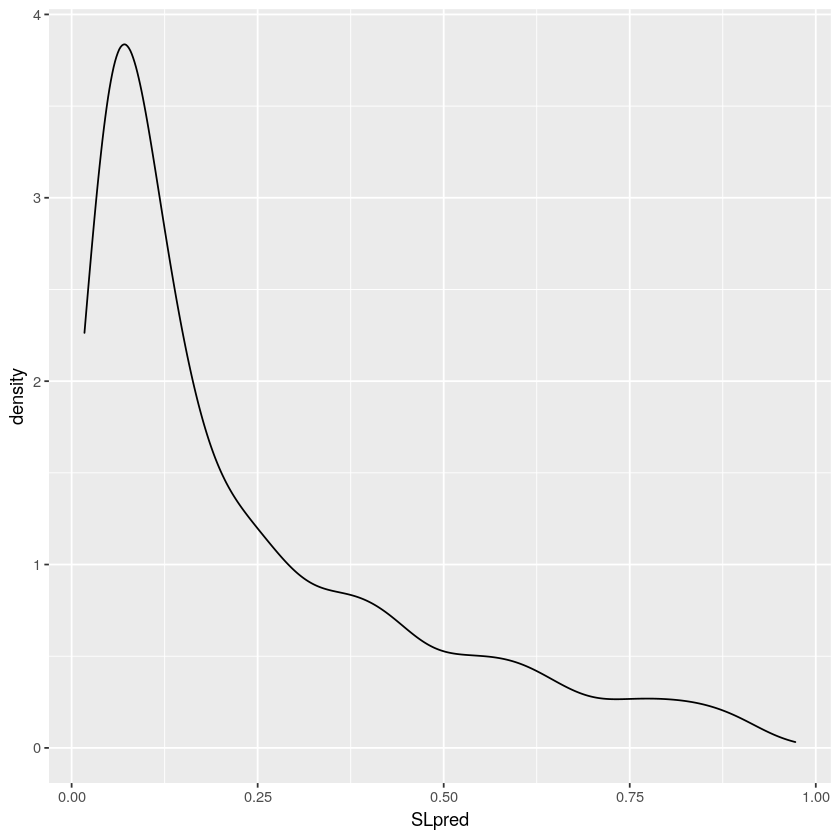

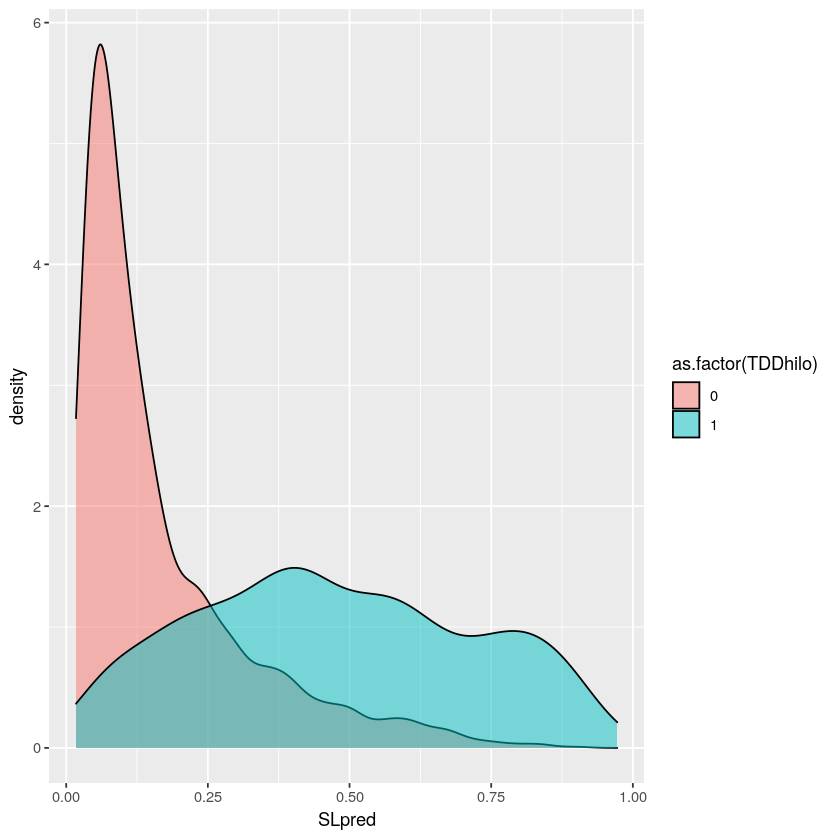

In [29]:
ggplot(df, aes(x = SLpred, fill = TDDhilo)) + geom_density(alpha = 0.5)
ggplot(df, aes(SLpred, fill = as.factor(TDDhilo))) + geom_density(alpha = 0.5)# geom_historgram

In [30]:
nrow(df %>% filter(TDD >80))
head(dfpr %>% filter(round(Precision,2) > 0.85) %>% arrange(Threshold))
head(dfpr %>% filter(round(Threshold,2) > 0.70) %>% arrange(Precision))
head(dfpr %>% filter(round(Precision,2) >= 0.80) %>% arrange(Threshold))

head(dfpr %>% filter(round(Threshold,2) > 0.62) %>% arrange(Precision))

[1] 30

,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
167,0.6727601,0.2358804,0.8554217
166,0.6728397,0.2358804,0.8606061
165,0.6731633,0.2358804,0.8658537
164,0.6732168,0.2358804,0.8711656
163,0.6743384,0.2342193,0.8703704
162,0.6743837,0.2325581,0.8695652


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
144,0.7115806,0.2126246,0.8951049
139,0.7144472,0.2059801,0.8985507
140,0.7132867,0.2076412,0.8992806
141,0.7130794,0.2093023,0.9000000
142,0.7127600,0.2109635,0.9007092
143,0.7126643,0.2126246,0.9014085


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
228,0.6082954,0.3006645,0.7973568
227,0.6087526,0.2990033,0.7964602
226,0.6092478,0.2990033,0.8000000
225,0.6105321,0.2973422,0.7991071
224,0.6114758,0.2956811,0.7982063
223,0.6159526,0.2956811,0.8018018


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
206,0.6324936,0.2774086,0.8146341
207,0.6302271,0.2790698,0.8155340
208,0.6293408,0.2807309,0.8164251
209,0.6289950,0.2823920,0.8173077
210,0.6251379,0.2840532,0.8181818
205,0.6336885,0.2774086,0.8186275


In [31]:
head(dfpr %>% filter(round(Threshold,2) <= 0.4) %>% arrange(desc(Precision)))#68 Recall 0.117 Threshold 0.83
head(dfpr %>% filter(round(Threshold,2) <= 0.4) %>% arrange(Recall))#68 Recall 0.117 Threshold 0.83

# dfpr %>% filter(round(Precision,3) > 0.77) %>% arrange(Threshold)#68 Recall 0.117 Threshold 0.83

,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
529,0.4046501,0.5847176,0.6666667
532,0.4043328,0.5880399,0.6666667
531,0.4045370,0.5863787,0.6660377
533,0.4039578,0.5880399,0.6654135
530,0.4046104,0.5847176,0.6654064
535,0.4028091,0.5897010,0.6647940


,Threshold,Recall,Precision
,<dbl>,<dbl>,<dbl>
529,0.4046501,0.5847176,0.6666667
530,0.4046104,0.5847176,0.6654064
531,0.4045370,0.5863787,0.6660377
532,0.4043328,0.5880399,0.6666667
533,0.4039578,0.5880399,0.6654135
534,0.4035007,0.5880399,0.6641651


[1] 602

[1] 2004

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   11.00   18.00   28.02   35.00  228.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.129   3.000   6.000 

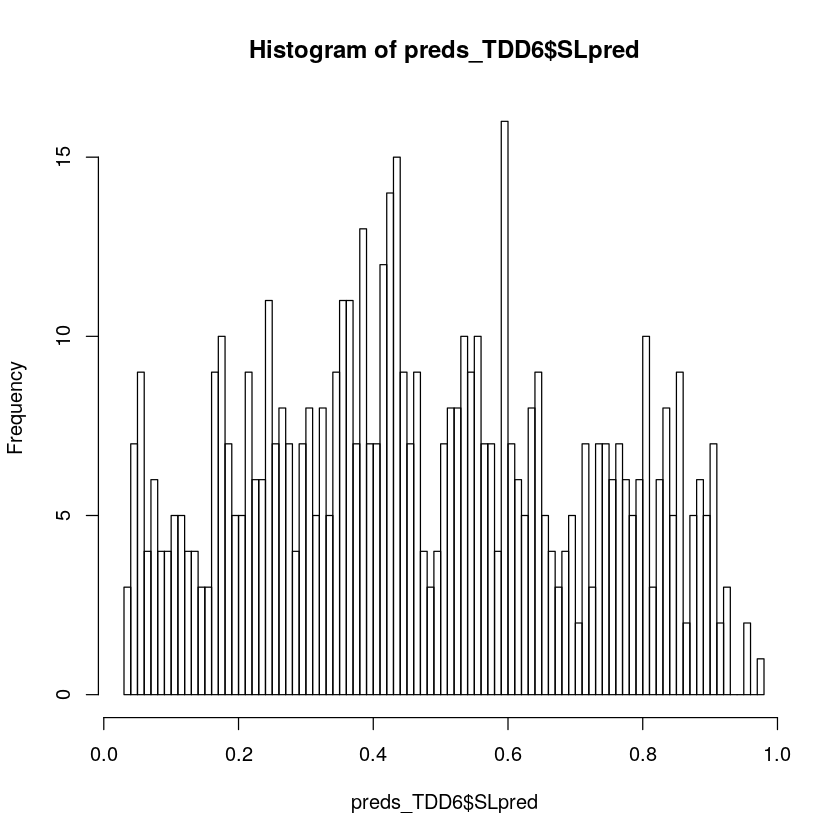

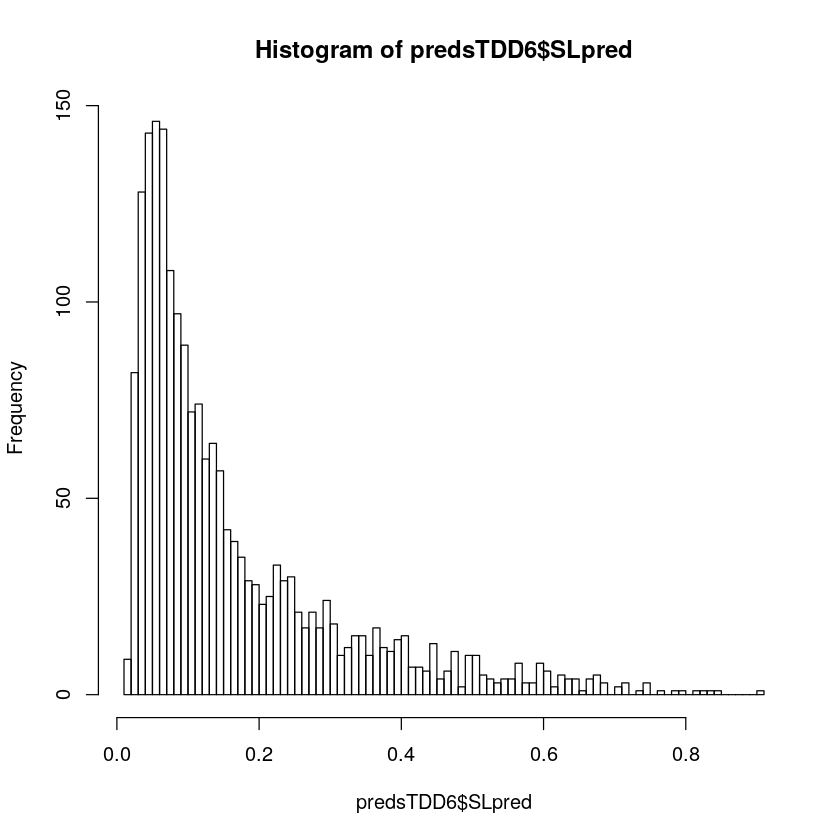

In [32]:
preds_TDD6 = df %>% filter(TDDhilo==1) 
predsTDD6 = df %>% filter(TDDhilo == 0) 
nrow(preds_TDD6)
nrow(predsTDD6)


# preds_0.75 = preds_TDD6 %>% filter(round(SLpred, 2) >= 0.75)
# nrow(preds_0.75)

# preds_0.6 = dfpreds %>% filter(round(SLpred, 2) >= 0.6, round(SLpred, 2) < 0.75)
# nrow(preds_0.6)

# summary(preds_0.75[$TDD)
# hist(preds_0.75$TDD, breaks=100)

# summary(preds_0.6$TDD)
# hist(preds_0.6$TDD, breaks=100)

summary(preds_TDD6$TDD)
summary(predsTDD6$TDD)

hist(preds_TDD6$SLpred, breaks=100)
hist(predsTDD6$SLpred, breaks=100)

# hist(preds_TDD6[preds_TDD6$TDD <=50, ]$TDD, breaks=100)

# summary(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.75 & round(preds_TDD6$SLpred,2) >=0.6, ]$TDD)
# summary(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.75, ]$TDD)
# summary(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.60, ]$TDD)

# # hist(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.75 & round(preds_TDD6$SLpred,2) >=0.6, ]$TDD, breaks=100, col="blue")
# hist(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.75, ]$TDD, breaks=100, col="blue")
# hist(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.60, ]$TDD, breaks=100, col="dodgerblue")
# hist(preds_TDD6[round(preds_TDD6$SLpred,2) < 0.57, ]$TDD, breaks=100, col="blue")

In [34]:
newdf <- preds_TDD6[round(preds_TDD6$SLpred,2) > 0.7, ]
nrow(newdf)
nrow(newdf %>% filter(TDD > 100))
# write.csv(newdf, file="../Data/newdf.csv", row.names=FALSE)

[1] 128

[1] 6

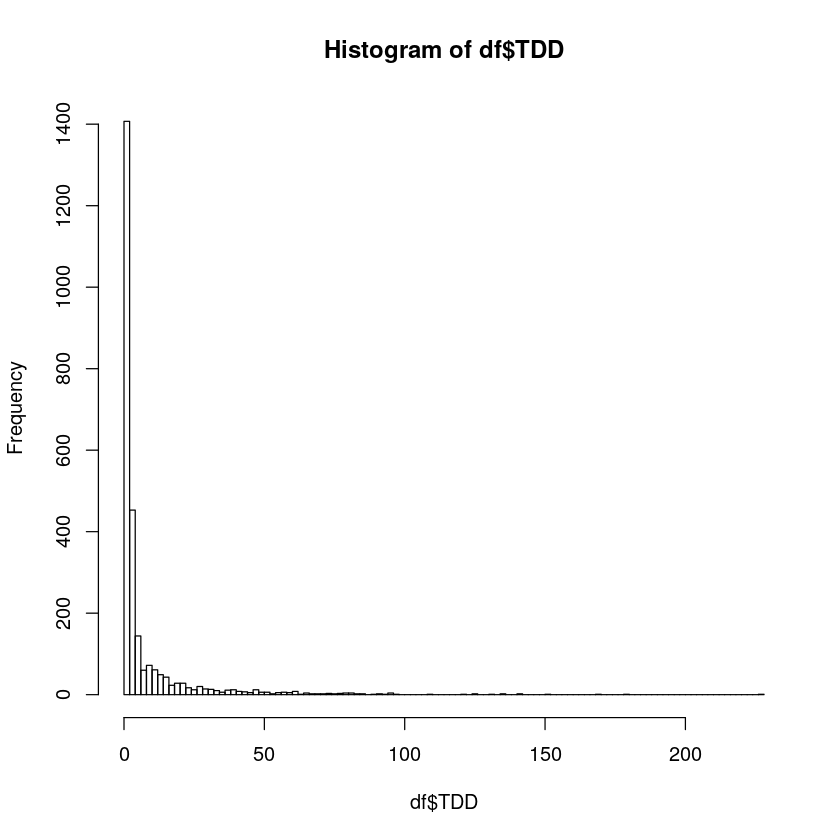

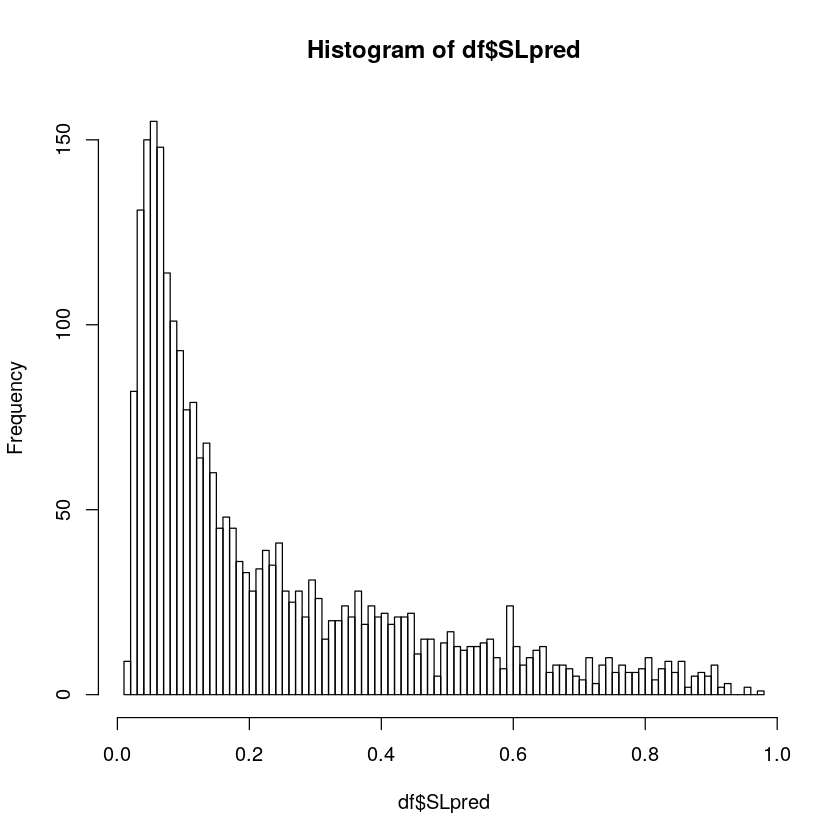

In [35]:
# ggplot(histogram, aes()) + 
#     geom_histogram(data = lowf0, fill = "red", alpha = 0.2) + 
#     geom_histogram(data = mediumf0, fill = "blue", alpha = 0.2) +
#     geom_histogram(data = highf0, fill = "green", alpha = 0.2) +

hist(df$TDD, breaks=100)
hist(df$SLpred, breaks=100)

In [36]:
head(df %>% arrange(SLpred)) #filter(SLpred==0.0001289)

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,patientDate,TDD,gender,age,medis,Weight,Height_i,⋯,race.White,a1c.high,a1c.missing,a1c.normal,a1c.panic.high,TDDhilo,TDD3,TDD4,TDD3_650,SLpred
,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,JCcc8ea6,131011162749,3542009,2010-12-12,1,1,54,1,60,154.94,⋯,0,0,1,0,0,0,0,0,0,0.01724707
2,JCe35da2,23359266,1110144,2008-12-09,1,0,41,1,67,167.64,⋯,0,0,1,0,0,0,0,0,0,0.01755539
3,JCddf44c,131064295730,13830474,2014-12-19,1,0,46,0,62,160.02,⋯,0,0,0,1,0,0,0,0,0,0.01799275
4,JCe8a943,131013203862,4413184,2011-04-25,4,1,65,1,60,160.00,⋯,1,0,1,0,0,0,0,0,0,0.01828426
5,JCdf3f00,131259073719,32725599,2018-10-15,1,1,78,1,64,157.48,⋯,1,0,1,0,0,0,0,0,0,0.01841347
6,JCcfab3b,131024007609,8606717,2013-04-22,1,1,48,0,71,165.10,⋯,0,0,0,1,0,0,0,0,0,0.01877139


### STAGE 2


In [43]:
data = read.csv("../Data/data-icu.csv")
dim(data)

data_6 = read.csv("../Data/data-icu.csv") %>% filter(TDD > 6) 
dim(data_6)
colnames(data_6)

[1] 13037    96

[1] 3010   96

[1] "anon_id"                     "pat_enc_csn_id_coded"       
 [3] "inpatient_data_id_coded"     "patientDate"                
 [5] "TDD"                         "gender"                     
 [7] "age"                         "medis"                      
 [9] "Weight"                      "Height_i"                   
[11] "delta_H"                     "CR"                         
[13] "first_glu"                   "num_glu"                    
[15] "mean_glu"                    "median_glu"                 
[17] "min_glu"                     "max_glu"                    
[19] "sd_glu"                      "num_micro"                  
[21] "hxBasal"                     "totalSteroids"              
[23] "dx.AB"                       "dx.CD"                      
[25] "dx.E"                        "dx.F"                       
[27] "dx.G"                        "dx.H"                       
[29] "dx.I"                        "dx.J"                       
[31] "dx.K"                        "dx.L"                       
[33] "dx.M"                        "dx.N"                       
[35] "dx.O"                        "dx.P"                       
[37] "dx.Q"                        "dx.R"                       
[39] "dx.ST"                       "dx.U"                       
[41] "dx.VY"                       "dx.W"                       
[43] "dx.X"                        "dx.Z"                       
[45] "Albumin..Ser.Plas"           "Alk.P.TASE..Total..Ser.Plas"
[47] "ALT..SGPT...Ser.Plas"        "AnionGap"                   
[49] "AST..SGOT...Ser.Plas"        "BUN"                        
[51] "Calcium..Ser.Plas"           "Cl"                         
[53] "CO2..Ser.Plas"               "Cr"                         
[55] "Eos"                         "Glucose"                    
[57] "HCO3_a"                      "HCO3_v"                     
[59] "Hgb"                         "K"                          
[61] "Lactate"                     "Na"                         
[63] "Neut"                        "O2sat_a"                    
[65] "O2sat_v"                     "pCO2_a"                     
[67] "pCO2_v"                      "pH_a"                       
[69] "pH_v"                        "Platelet"                   
[71] "PO2_a"                       "PO2_v"                      
[73] "Protein..Total..Ser.Plas"    "TBili"                      
[75] "TCO2..v...ISTAT"             "TCO2_a"                     
[77] "Trop"                        "WBC"                        
[79] "diet.d1.npo"                 "diet.d2.others"             
[81] "diet.d3.carb"                "race.Asian"                 
[83] "race.Black"                  "race.Native.American"       
[85] "race.Other"                  "race.Pacific.Islander"      
[87] "race.Unknown"                "race.White"                 
[89] "a1c.high"                    "a1c.missing"                
[91] "a1c.normal"                  "a1c.panic.high"             
[93] "TDDhilo"                     "TDD3"                       
[95] "TDD4"                        "TDD3_650"

In [45]:
X = data[, 6:92]
X6 = data_6[, 6:92]
dim(X6) # vs 3971 from before with all icu patients
head(X6)

[1] 3010   87

,gender,age,medis,Weight,Height_i,delta_H,CR,first_glu,num_glu,mean_glu,⋯,race.Black,race.Native.American,race.Other,race.Pacific.Islander,race.Unknown,race.White,a1c.high,a1c.missing,a1c.normal,a1c.panic.high
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,43,0,79,165.00,0,0.48,179,1,179.0000,⋯,0,0,1,0,0,0,1,0,0,0
2,1,55,1,72,160.00,1,0.45,192,1,192.0000,⋯,0,0,1,0,0,0,0,1,0,0
3,0,47,0,126,177.80,0,1.13,121,28,181.3214,⋯,0,0,1,0,0,0,0,1,0,0
4,0,79,1,67,170.18,0,0.69,126,8,184.5000,⋯,0,0,0,0,0,1,0,1,0,0
5,0,68,1,74,162.56,0,2.32,66,63,152.0317,⋯,0,0,1,0,0,0,1,0,0,0
6,1,45,0,48,162.61,0,1.72,179,101,242.7525,⋯,0,0,0,0,0,1,0,0,0,1


In [49]:
# get the probablity prediction for all patients TDD > 6, not just test data
modelSL = load("SLmodel_hilo-ic.RData")

SLpreds_6 = predict(get(modelSL), X6)
SLpreds_all = predict(get(modelSL), X)

Loading required namespace: randomForest

Loading required namespace: gbm



List of 2
 $ pred           : num [1:3010, 1] 0.296 0.389 0.555 0.403 0.505 ...
 $ library.predict: num [1:3010, 1:3] 0.0843 0.1891 0.3359 0.2274 0.3135 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "SL.glmnet_All" "SL.randomForest_All" "SL.gbm_All"


[1] 3010

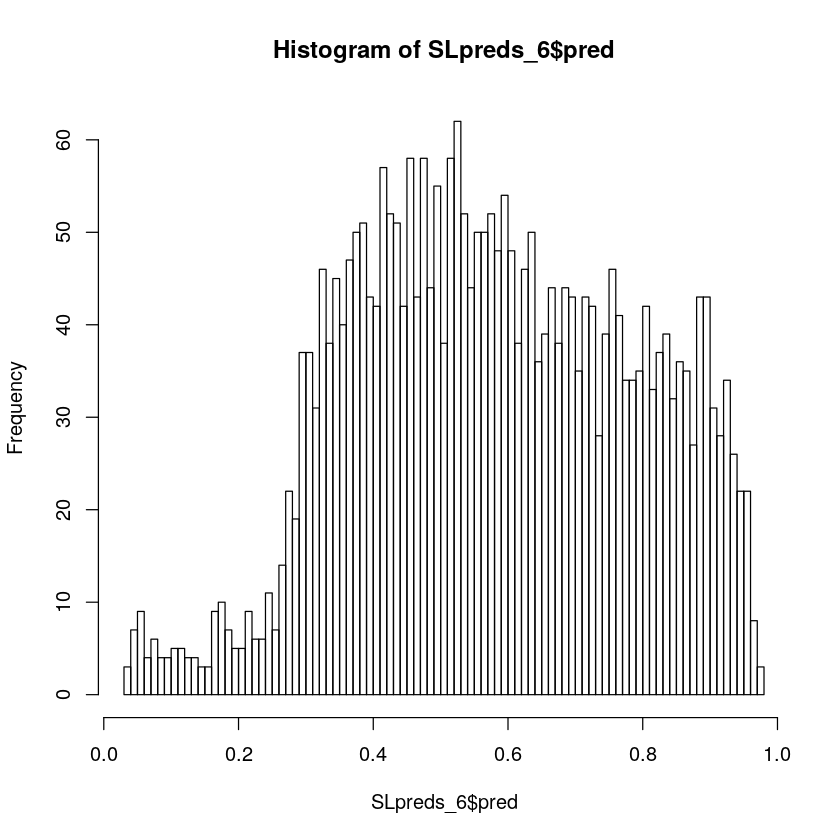

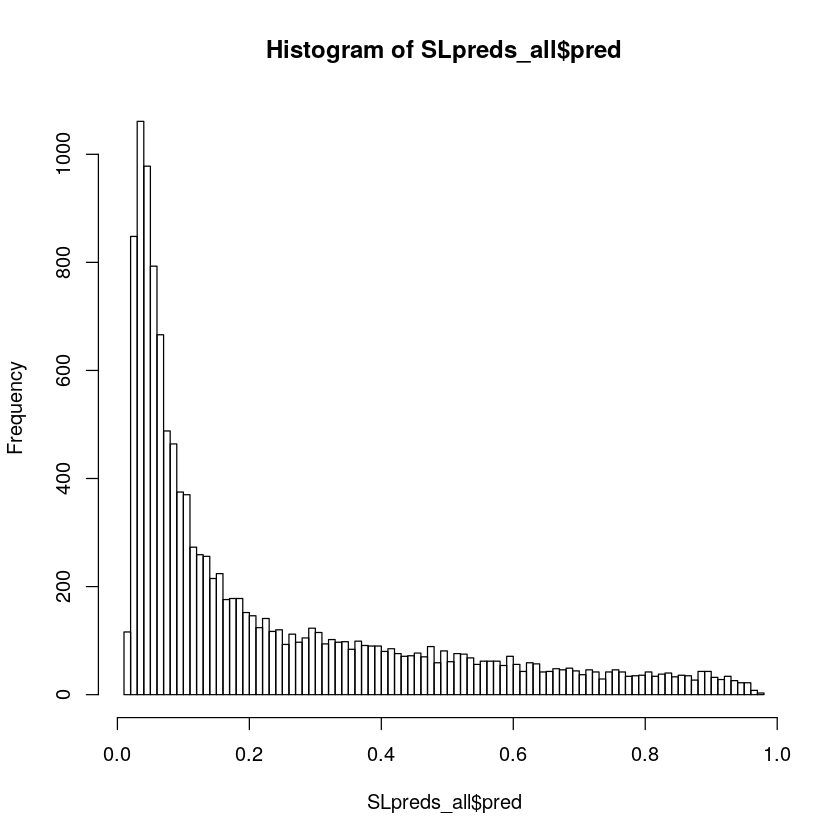

In [50]:
str(SLpreds_6)
nrow(data_6)
hist(SLpreds_6$pred, breaks=100)
hist(SLpreds_all$pred, breaks=100)

In [54]:
head(SLpreds_6$pred)

0.2957903
0.3886247
0.5545436
0.4032116
0.5046475
0.9592467


In [55]:
data_6$pred = SLpreds_6$pred
data$pred = SLpreds_all$pred

In [56]:
nrow(data_6)
nrow(data %>% filter(pred > 0.7))
nrow(data_6 %>% filter(pred > 0.7))

nrow(data %>% filter(pred > 0.4, pred <=0.7))
nrow(data_6 %>% filter(pred > 0.4, pred <= 0.7))

nrow(data %>% filter(pred <= 0.4))
nrow(data_6 %>% filter(pred <= 0.4))

[1] 3010

[1] 935

[1] 918

[1] 1894

[1] 1436

[1] 10208

[1] 656

In [58]:
write.csv(data_6, "../Data/data_6-icu-SLpreds.csv", row.names=FALSE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



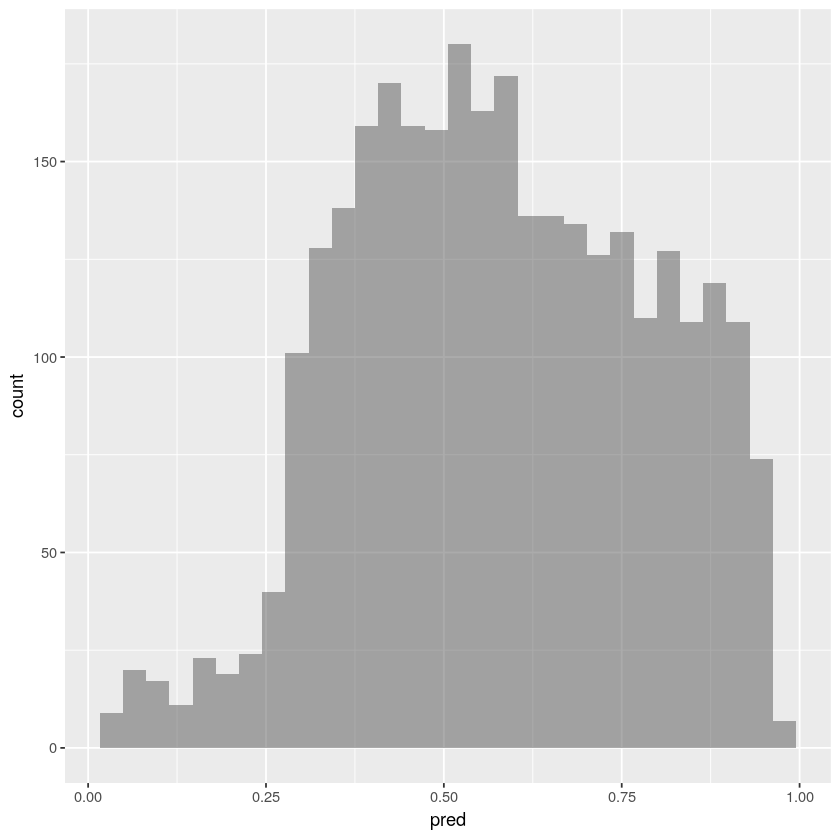

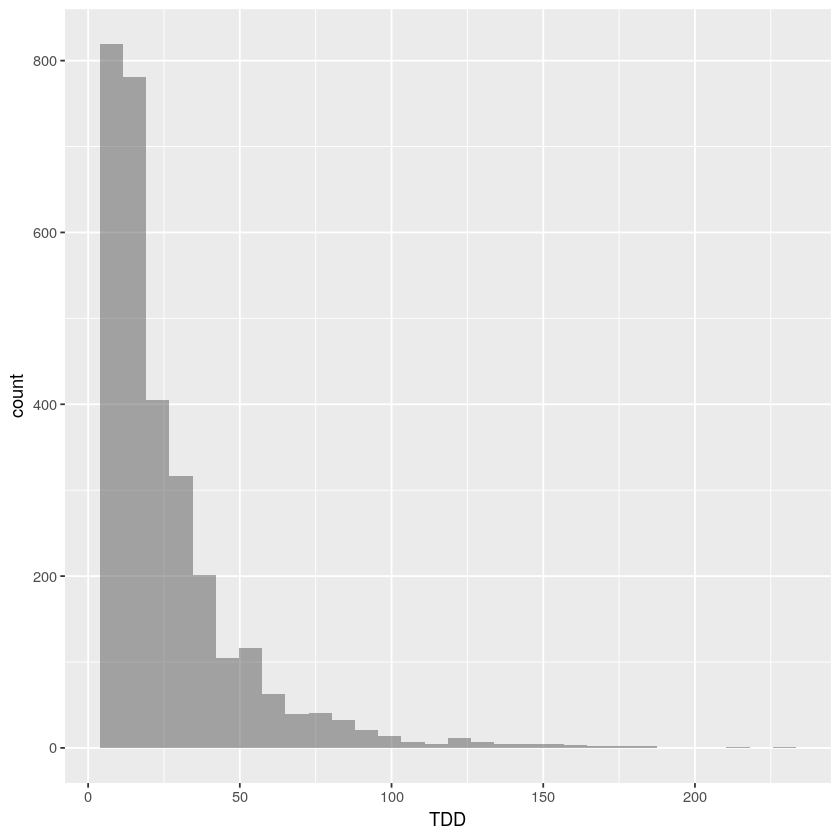

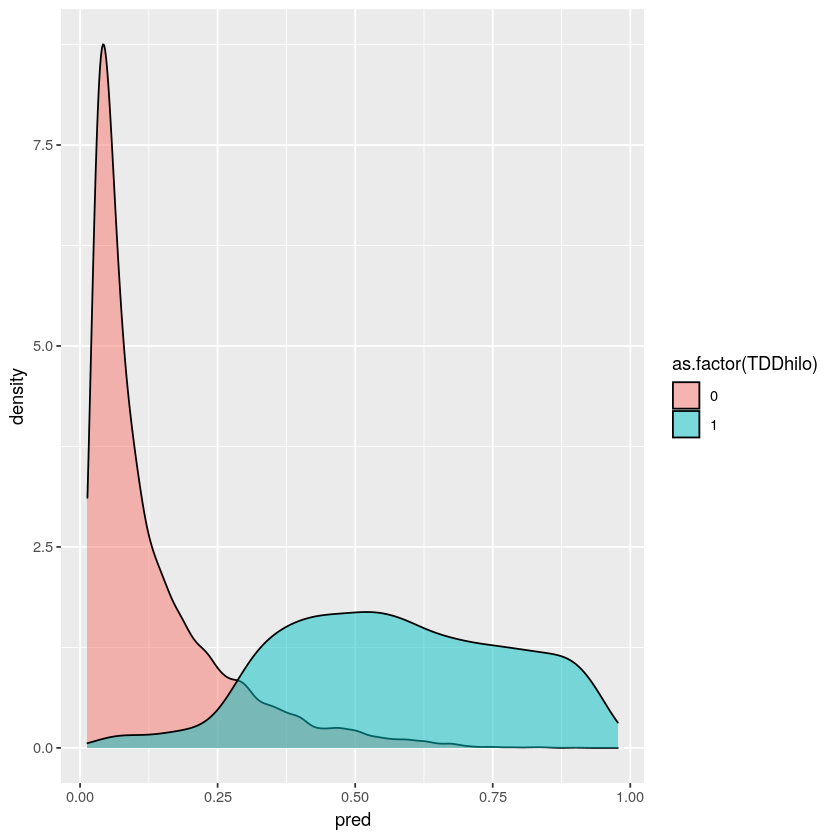

In [64]:
ggplot(data_6, aes(pred)) + geom_histogram(alpha = 0.5)
ggplot(data_6, aes(TDD)) + geom_histogram(alpha = 0.5)

ggplot(data, aes(pred, fill = as.factor(TDDhilo))) + geom_density(alpha = 0.5)# geom_historgram
# ggplot(data, aes(pred, fill = as.factor(TDDhilo))) + geom_density(alpha = 0.5) + xlim(0.25, 0.75)

In [68]:
data_6 %>% arrange(desc(pred)) %>% head(n=20)
data_6 %>% arrange(pred) %>% head(n=20)

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,patientDate,TDD,gender,age,medis,Weight,Height_i,⋯,race.White,a1c.high,a1c.missing,a1c.normal,a1c.panic.high,TDDhilo,TDD3,TDD4,TDD3_650,pred
,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,"<dbl[,1]>"
1,JCe3d4d4,131236908207,25596756,2017-07-17,154,0,58,0,175.0,170.18,⋯,1,0,0,0,1,1,2,3,2,0.9773611
2,JCd1f333,131250233286,29871276,2018-05-11,60,1,38,0,80.0,167.64,⋯,1,0,0,0,1,1,2,3,2,0.9725075
3,JCe181bf,131278544490,43088412,2019-12-13,22,1,53,0,75.0,152.40,⋯,1,0,0,0,1,1,2,2,1,0.9702101
4,JC2a2be5c,131283990265,46459764,2020-02-12,81,0,50,0,75.0,160.00,⋯,0,0,0,0,1,1,2,3,2,0.9686073
5,JCd5e216,131261061605,33436944,2019-01-23,82,1,37,0,91.0,162.56,⋯,0,0,0,0,1,1,2,3,2,0.9651998
6,JCe1885a,131239474204,26476991,2017-09-26,38,0,83,1,79.0,167.64,⋯,0,0,0,0,1,1,2,2,1,0.9633422
7,JCdf4240,131260433220,33213694,2018-11-21,9,0,75,0,69.0,179.07,⋯,0,0,0,0,1,1,1,1,1,0.9629526
8,JCdc5d49,131210198053,22572168,2016-12-09,34,0,61,0,64.0,170.18,⋯,0,0,0,0,1,1,2,2,1,0.9620951
9,JCdcc1fd,131106513135,16322793,2015-10-05,218,0,68,1,212.0,168.00,⋯,1,0,0,0,1,1,2,3,2,0.9615904


,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,patientDate,TDD,gender,age,medis,Weight,Height_i,⋯,race.White,a1c.high,a1c.missing,a1c.normal,a1c.panic.high,TDDhilo,TDD3,TDD4,TDD3_650,pred
,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,"<dbl[,1]>"
1,JCe280d9,131017999590,6212684,2012-04-20,7,1,76,0,68,161.00,⋯,1,0,1,0,0,1,1,1,1,0.03126410
2,JCdb64b4,16101008,877300,2008-07-09,7,1,78,1,47,147.00,⋯,0,0,1,0,0,1,1,1,1,0.03634327
3,JCd003d5,15755114,825432,2008-07-12,51,0,73,1,74,172.72,⋯,1,0,1,0,0,1,2,3,2,0.03712507
4,JCe161be,131014195164,4822966,2011-07-28,8,1,79,1,53,152.00,⋯,1,1,0,0,0,1,1,1,1,0.04099084
5,JCda9fb8,131027844356,10147229,2013-11-11,10,1,61,1,118,160.00,⋯,1,0,1,0,0,1,1,1,1,0.04137013
6,JCe49a43,16282779,903840,2008-10-09,9,1,65,1,103,157.00,⋯,0,0,1,0,0,1,1,1,1,0.04492691
7,JCd29bca,32581228,1317139,2009-04-23,8,0,78,0,93,193.04,⋯,1,0,1,0,0,1,1,1,1,0.04559358
8,JC2a2f634,131276968357,42164193,2019-10-03,20,1,37,0,89,157.00,⋯,0,0,1,0,0,1,1,1,1,0.04679984
9,JCcdb08f,131013078890,4382828,2011-04-02,10,0,72,0,86,180.34,⋯,1,0,1,0,0,1,1,1,1,0.04826723


In [69]:
# create train/val vs test (20%) set data using indices
set.seed(123)

trainIndex <- createDataPartition(data_6$TDD, p = .8, list = FALSE, times = 1)
train <- data_6[trainIndex,]
test <- data_6[-trainIndex,]

dim(data_6)
dim(train)
dim(test)

head(test[, 1:6])
head(test[, 92:length(test)])

[1] 3010   97

[1] 2410   97

[1] 600  97

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,patientDate,TDD,gender
,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>
1,JC29f918a,131276412143,41840342,2019-10-10,11,0
8,JC29fae5a,131278758997,43226244,2019-12-09,28,0
9,JC29fb1a8,131273277175,39744721,2019-07-20,8,0
10,JC29fc486,131271419000,38523162,2019-08-18,28,0
16,JC29ff138,131281751277,45057735,2020-01-24,10,0
35,JC2a036f1,131280177694,44127988,2020-02-11,39,1


,a1c.panic.high,TDDhilo,TDD3,TDD4,TDD3_650,pred
,<int>,<int>,<int>,<int>,<int>,"<dbl[,1]>"
1,0,1,1,1,1,0.2957903
8,0,1,2,2,1,0.7617033
9,0,1,1,1,1,0.5461559
10,0,1,2,2,1,0.4495428
16,0,1,1,1,1,0.3509810
35,1,1,2,2,1,0.9519881


In [71]:
summary(data_6$TDD)
nrow(data_6)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.15   11.00   18.00   26.52   33.00  228.00 

[1] 3010

In [81]:
yfit = predict(fit, type="response")

yfit_6 = predict(fit_6, type="response")
mape =  mean(abs(yfit_6-data_6$TDD)/data_6$TDD)
mae =  mean(abs(yfit_6-data_6$TDD))
print(mape)
print(mae) 
# 0.935207
# 24.03228

[1] 0.9371431
[1] 25.52253


In [80]:
pred_rocr = ROCR::prediction(yfit, data$TDDhilo)
auc = ROCR::performance(pred_rocr, measure = "auc", x.measure = "cutoff")@y.values[[1]]
prc = ROCR::performance(pred_rocr, measure = "aucpr", x.measure = "cutoff")@y.values[[1]]
acc = ROCR::performance(pred_rocr, measure = "acc", x.measure = "cutoff")@y.values[[1]]

PRC.perf <- ROCR::performance(pred_rocr, "prec", "rec")
ROC.perf <-  ROCR::performance(pred_rocr, "tpr", "fpr")
auc; prc; mean(acc)


[1] 0.5795836

[1] 0.2782456

[1] 0.5817938

In [24]:
library(lmvar)
dfn = data_6 %>% filter(pred <= 0.72)
fit = lm(dfn$TDD ~ dfn$Weight, y=TRUE, x=TRUE)
cv = cv.lm(fit)

# Print 'cv' using the print-method print.cvlmvar
cv

# Print 'cv' with a specified number of digits
print(cv, digits = 2)

Mean absolute error        :  10.87662 
Sample standard deviation  :  0.7924715 

Mean squared error         :  276.6315 
Sample standard deviation  :  84.24138 

Root mean squared error    :  16.47489 
Sample standard deviation  :  2.405928 


Mean absolute error        :  10.88 
Sample standard deviation  :  0.79 

Mean squared error         :  277 
Sample standard deviation  :  84 

Root mean squared error    :  16.5 
Sample standard deviation  :  2.4 



In [27]:
yfit_672 = predict(fit, type="response")

mape =  mean(abs(yfit_672 - dfn$TDD)/dfn$TDD)
mae =  mean(abs(yfit_672 - dfn$TDD))
print(mape)
print(mae)

[1] 0.6745572
[1] 10.87154


In [82]:
# create train/val vs test (20%) set data using indices
set.seed(123)

trainIndex <- createDataPartition(data_6$TDD, p = .8, list = FALSE, times = 1)
train <- data_6[trainIndex,]
test <- data_6[-trainIndex,]

# check to see where X and Y are
head(test[, 1:6])
head(test[, 92:length(test)])

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,patientDate,TDD,gender
,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>
1,JC29f918a,131276412143,41840342,2019-10-10,11,0
8,JC29fae5a,131278758997,43226244,2019-12-09,28,0
9,JC29fb1a8,131273277175,39744721,2019-07-20,8,0
10,JC29fc486,131271419000,38523162,2019-08-18,28,0
16,JC29ff138,131281751277,45057735,2020-01-24,10,0
35,JC2a036f1,131280177694,44127988,2020-02-11,39,1


,a1c.panic.high,TDDhilo,TDD3,TDD4,TDD3_650,pred
,<int>,<int>,<int>,<int>,<int>,"<dbl[,1]>"
1,0,1,1,1,1,0.2957903
8,0,1,2,2,1,0.7617033
9,0,1,1,1,1,0.5461559
10,0,1,2,2,1,0.4495428
16,0,1,1,1,1,0.3509810
35,1,1,2,2,1,0.9519881


In [83]:
dim(train[, 5:92])

[1] 2410   88

In [84]:
# glmG <- glm(TDD ~ ., data = train[, 5:92], family=Gamma(link=log))
# glmg <- glm(TDD ~ ., data = train[, 5:92], family=gaussian(link=inverse)) # inverse is worse
glml <- glm(log(TDD) ~ ., data = train[, 5:92])
# glmnl <-cv.glmnet(x=as.matrix(train[, 5:92]),y=log(train$TDD))

In [85]:
# icu removed
glmnl <- cv.glmnet(x=as.matrix(train[, 6:92]),y=log(train$TDD))
yglmnl <- predict(glmnl, newx=as.matrix(test[, 6:92]))[,1]
head(yglmnl)
mapen =  mean(abs(exp(yglmnl) - test$TDD)/test$TDD)
maen =  mean(abs(exp(yglmnl) - test$TDD))
print(mapen)
print(maen)

# old result
# [1] 0.5316793
# [1] 12.57032

1        8        9       10       16       35 
2.626933 3.153475 2.924702 2.804738 2.859029 3.768261

[1] 0.5672011
[1] 13.5171


In [86]:
summary(glml)


Call:
glm(formula = log(TDD) ~ ., data = train[, 5:92])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.26679  -0.42379  -0.03407   0.38856   2.35303  

Coefficients: (4 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.805e+00  3.312e-01   8.467  < 2e-16 ***
gender                      -9.399e-02  3.637e-02  -2.584 0.009830 ** 
age                         -5.007e-03  1.114e-03  -4.493 7.38e-06 ***
medis                        8.394e-02  2.790e-02   3.009 0.002650 ** 
Weight                       7.848e-03  6.099e-04  12.868  < 2e-16 ***
Height_i                    -2.656e-03  1.793e-03  -1.481 0.138763    
delta_H                      2.648e-01  1.280e-01   2.069 0.038694 *  
CR                          -1.491e-02  9.327e-03  -1.598 0.110159    
first_glu                    1.415e-04  2.045e-04   0.692 0.489072    
num_glu                      3.734e-03  7.168e-04   5

[1] "anon_id"                     "pat_enc_csn_id_coded"       
 [3] "inpatient_data_id_coded"     "patientDate"                
 [5] "TDD"                         "gender"                     
 [7] "age"                         "medis"                      
 [9] "Weight"                      "Height_i"                   
[11] "delta_H"                     "CR"                         
[13] "first_glu"                   "num_glu"                    
[15] "mean_glu"                    "median_glu"                 
[17] "min_glu"                     "max_glu"                    
[19] "sd_glu"                      "num_micro"                  
[21] "hxBasal"                     "totalSteroids"              
[23] "dx.AB"                       "dx.CD"                      
[25] "dx.E"                        "dx.F"                       
[27] "dx.G"                        "dx.H"                       
[29] "dx.I"                        "dx.J"                       
[31] "dx.K"                        "dx.L"                       
[33] "dx.M"                        "dx.N"                       
[35] "dx.O"                        "dx.P"                       
[37] "dx.Q"                        "dx.R"                       
[39] "dx.ST"                       "dx.U"                       
[41] "dx.VY"                       "dx.W"                       
[43] "dx.X"                        "dx.Z"                       
[45] "Albumin..Ser.Plas"           "Alk.P.TASE..Total..Ser.Plas"
[47] "ALT..SGPT...Ser.Plas"        "AnionGap"                   
[49] "AST..SGOT...Ser.Plas"        "BUN"                        
[51] "Calcium..Ser.Plas"           "Cl"                         
[53] "CO2..Ser.Plas"               "Cr"                         
[55] "Eos"                         "Glucose"                    
[57] "HCO3_a"                      "HCO3_v"                     
[59] "Hgb"                         "K"                          
[61] "Lactate"                     "Na"                         
[63] "Neut"                        "O2sat_a"                    
[65] "O2sat_v"                     "pCO2_a"                     
[67] "pCO2_v"                      "pH_a"                       
[69] "pH_v"                        "Platelet"                   
[71] "PO2_a"                       "PO2_v"                      
[73] "Protein..Total..Ser.Plas"    "TBili"                      
[75] "TCO2..v...ISTAT"             "TCO2_a"                     
[77] "Trop"                        "WBC"                        
[79] "diet.d1.npo"                 "diet.d2.others"             
[81] "diet.d3.carb"                "race.Asian"                 
[83] "race.Black"                  "race.Native.American"       
[85] "race.Other"                  "race.Pacific.Islander"      
[87] "race.Unknown"                "race.White"                 
[89] "a1c.high"                    "a1c.missing"                
[91] "a1c.normal"                  "a1c.panic.high"             
[93] "TDDhilo"                     "TDD3"                       
[95] "TDD4"                        "TDD3_650"                   
[97] "pred"                        "dummy"

[1] "gender"                      "age"                        
 [3] "medis"                       "Weight"                     
 [5] "Height_i"                    "delta_H"                    
 [7] "CR"                          "first_glu"                  
 [9] "num_glu"                     "mean_glu"                   
[11] "median_glu"                  "min_glu"                    
[13] "max_glu"                     "sd_glu"                     
[15] "num_micro"                   "hxBasal"                    
[17] "totalSteroids"               "dx.AB"                      
[19] "dx.CD"                       "dx.E"                       
[21] "dx.F"                        "dx.G"                       
[23] "dx.H"                        "dx.I"                       
[25] "dx.J"                        "dx.K"                       
[27] "dx.L"                        "dx.M"                       
[29] "dx.N"                        "dx.O"                       
[31] "dx.P"                        "dx.Q"                       
[33] "dx.R"                        "dx.ST"                      
[35] "dx.U"                        "dx.VY"                      
[37] "dx.W"                        "dx.X"                       
[39] "dx.Z"                        "Albumin..Ser.Plas"          
[41] "Alk.P.TASE..Total..Ser.Plas" "ALT..SGPT...Ser.Plas"       
[43] "AnionGap"                    "AST..SGOT...Ser.Plas"       
[45] "BUN"                         "Calcium..Ser.Plas"          
[47] "Cl"                          "CO2..Ser.Plas"              
[49] "Cr"                          "Eos"                        
[51] "Glucose"                     "HCO3_a"                     
[53] "HCO3_v"                      "Hgb"                        
[55] "K"                           "Lactate"                    
[57] "Na"                          "Neut"                       
[59] "O2sat_a"                     "O2sat_v"                    
[61] "pCO2_a"                      "pCO2_v"                     
[63] "pH_a"                        "pH_v"                       
[65] "Platelet"                    "PO2_a"                      
[67] "PO2_v"                       "Protein..Total..Ser.Plas"   
[69] "TBili"                       "TCO2..v...ISTAT"            
[71] "TCO2_a"                      "Trop"                       
[73] "WBC"                         "diet.d1.npo"                
[75] "diet.d2.others"              "diet.d3.carb"               
[77] "race.Asian"                  "race.Black"                 
[79] "race.Native.American"        "race.Other"                 
[81] "race.Pacific.Islander"       "race.Unknown"               
[83] "race.White"                  "a1c.high"                   
[85] "a1c.missing"                 "a1c.normal"                 
[87] "a1c.panic.high"              "dummy"

[1] 3010   88

[1] 0.09402885

[1] 14.74561

List of 11
 $ lambda    : num [1:85] 138 126 114 104 95 ...
 $ cvm       : num [1:85] 21452 18449 15760 13527 11673 ...
 $ cvsd      : num [1:85] 1706 1593 1422 1276 1150 ...
 $ cvup      : num [1:85] 23158 20042 17182 14803 12823 ...
 $ cvlo      : num [1:85] 19746 16856 14337 12251 10523 ...
 $ nzero     : Named int [1:85] 0 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:85] "s0" "s1" "s2" "s3" ...
 $ call      : language cv.glmnet(x = as.matrix(datad[trainIndex, 1:87]), y = datad[trainIndex,      ]$dummy)
 $ name      : Named chr "Mean-Squared Error"
  ..- attr(*, "names")= chr "mse"
 $ glmnet.fit:List of 12
  ..$ a0       : Named num [1:85] 137.8 125.6 114.6 104.5 95.4 ...
  .. ..- attr(*, "names")= chr [1:85] "s0" "s1" "s2" "s3" ...
  ..$ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:1393] 6 6 6 6 6 6 6 6 6 6 ...
  .. .. ..@ p       : int [1:86] 0 0 1 2 3 4 5 6 7 8 ...
  .. .. ..@ Dim     : int [1:2] 87 85
  .. .. ..@ Dimname

Warning message in predicted - true:
“longer object length is not a multiple of shorter object length”


[1] -0.6908022

[1] 0.9419288

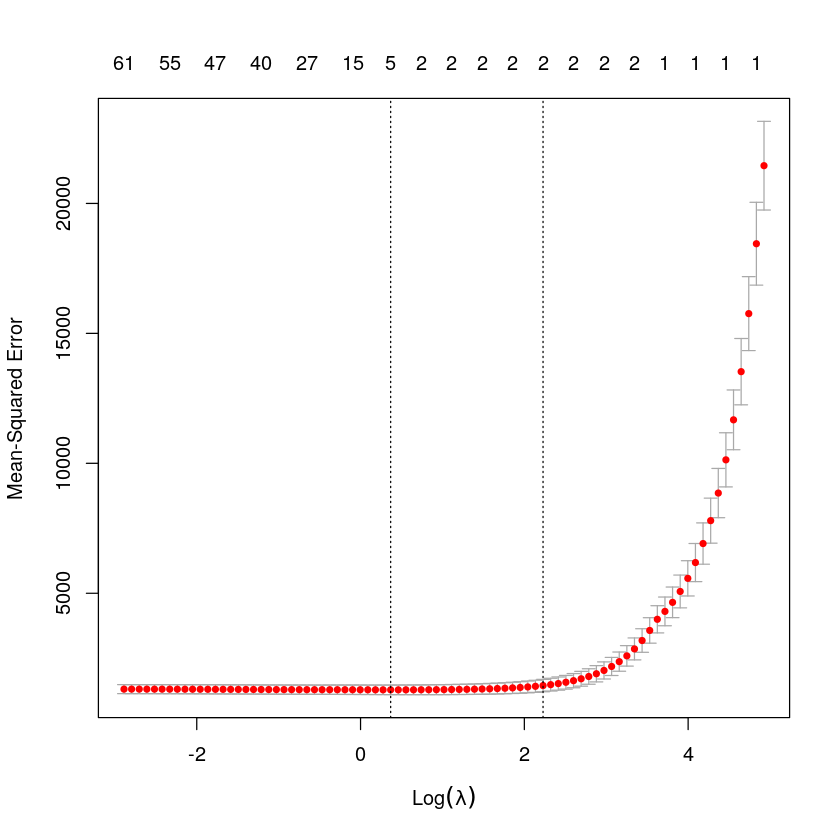

In [116]:
# dummy variable
data_6$dummy = data_6$Weight * data_6$CR
colnames(data_6)
colnames(data_6[, c(6:92, 98)])
datad = data_6[, c(6:92, 98)]
dim(datad)
glmld <- glm(dummy ~ ., data = datad[trainIndex, ])

glmnld <- cv.glmnet(x=as.matrix(datad[trainIndex, 1:87]),y=datad[trainIndex, ]$dummy)
yglmnld <- predict(glmnld, newx=as.matrix(datad[-trainIndex, 1:87]))[,1]
mean(abs(yglmnld - datad[-trainIndex, ]$dummy)/datad[-trainIndex, ]$dummy)
mean(abs(yglmnld - datad[-trainIndex, ]$dummy))
str(glmnld)

rsquare <- function(true, predicted) {
  sse <- sum((predicted - true)^2)
  sst <- sum((true - mean(true))^2)
  rsq <- 1 - sse / sst
  return (rsq)
}

rsquare(datad[trainIndex, ]$dummy, yglmnld)
plot(glmnld)
glmnld$glmnet.fit$dev.ratio[which(glmnld$glmnet.fit$lambda == glmnld$lambda.min)]

In [137]:
train72 = train %>% filter(pred <= 0.72)
test72 = test %>% filter(pred <= 0.72)
glmnl <- cv.glmnet(x=as.matrix(train72[, 6:92]),y=log(train72$TDD))
yglmnl <- predict(glmnl, newx=as.matrix(test72[, 6:92]))[,1]
head(yglmnl)
mapen =  mean(abs(exp(yglmnl) - test72$TDD)/test72$TDD)
maen =  mean(abs(exp(yglmnl) - test72$TDD))
print(mapen)
print(maen)

[1] 2.711743 2.795423 2.901345 2.573877 2.640011 2.633741

[1] 0.4973888
[1] 9.529289


In [122]:
yglmG <- predict(glmG, test[, 6:92])
yglmg <- predict(glmg, test[, 6:92])
yglml <- predict(glml, test[, 6:92])

head(yglml)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


1        6        9       10       12       18 
2.642017 2.889327 3.906795 2.852487 2.535108 2.455587

In [106]:
# icu removed, weight only
glmlW <- glm(log(TDD) ~ Weight, data = train[, 5:92])
glmlW
yglmlW <- predict(glmlW, test[, 6:92])
head(yglmlW)

mapeW =  mean(abs(exp(yglmlW) - test$TDD)/test$TDD)
maeW =  mean(abs(exp(yglmlW) - test$TDD))
print(mapeW)
print(maeW)


Call:  glm(formula = log(TDD) ~ Weight, data = train[, 5:92])

Coefficients:
(Intercept)       Weight  
   2.338068     0.007379  

Degrees of Freedom: 2409 Total (i.e. Null);  2408 Residual
Null Deviance:	    1260 
Residual Deviance: 1178 	AIC: 5119

1        8        9       10       16       35 
2.921034 3.031724 3.105517 2.891517 3.024345 3.120276

[1] 0.6365751
[1] 14.59696


In [123]:
glmlW <- glm(log(TDD) ~ Weight, data = train[, 5:92])
glmlW
yglmlW <- predict(glmlW, test[, 6:92])
head(yglmlW)

mapeW =  mean(abs(exp(yglmlW) - test$TDD)/test$TDD)
maeW =  mean(abs(exp(yglmlW) - test$TDD))
print(mapeW)
print(maeW)


Call:  glm(formula = log(TDD) ~ Weight, data = train[, 5:92])

Coefficients:
(Intercept)       Weight  
   2.355683     0.006605  

Degrees of Freedom: 3177 Total (i.e. Null);  3176 Residual
Null Deviance:	    1539 
Residual Deviance: 1454 	AIC: 6540

1        6        9       10       12       18 
2.877514 2.844487 2.672745 3.148338 2.732194 2.969991

[1] 0.602694
[1] 14.04041


In [158]:
dfest = bind_cols(y = test$TDD, yhatW = exp(yglmlW), yhat = exp(yglmnl))
head(dfest)
nrow(dfest)

y,yhatW,yhat
<dbl>,<dbl>,<dbl>
11,17.77004,14.33331
14,17.19273,18.06437
178,14.47966,36.41652
12,23.29731,20.72646
9,15.36656,12.60904
10,19.49173,13.95406


[1] 793

In [124]:
# mape =  mean(abs(yglmG - log(test$TDD))/log(test$TDD))
# mae =  mean(abs(yglmG - log(test$TDD)))
mapeG =  mean(abs(exp(yglmG) - test$TDD)/test$TDD)
maeG =  mean(abs(exp(yglmG) - test$TDD))
print(mapeG)
print(maeG)

mapeg =  mean(abs(exp(yglmg) - test$TDD)/test$TDD)
maeg =  mean(abs(exp(yglmg) - test$TDD))
print(mapeg)
print(maeg)

mapel =  mean(abs(exp(yglml) - test$TDD)/test$TDD)
mael =  mean(abs(exp(yglml) - test$TDD))
print(mapel)
print(mael)

[1] 0.654374
[1] 12.57711
[1] 0.9315539
[1] 24.35965
[1] 0.5164213
[1] 12.14755


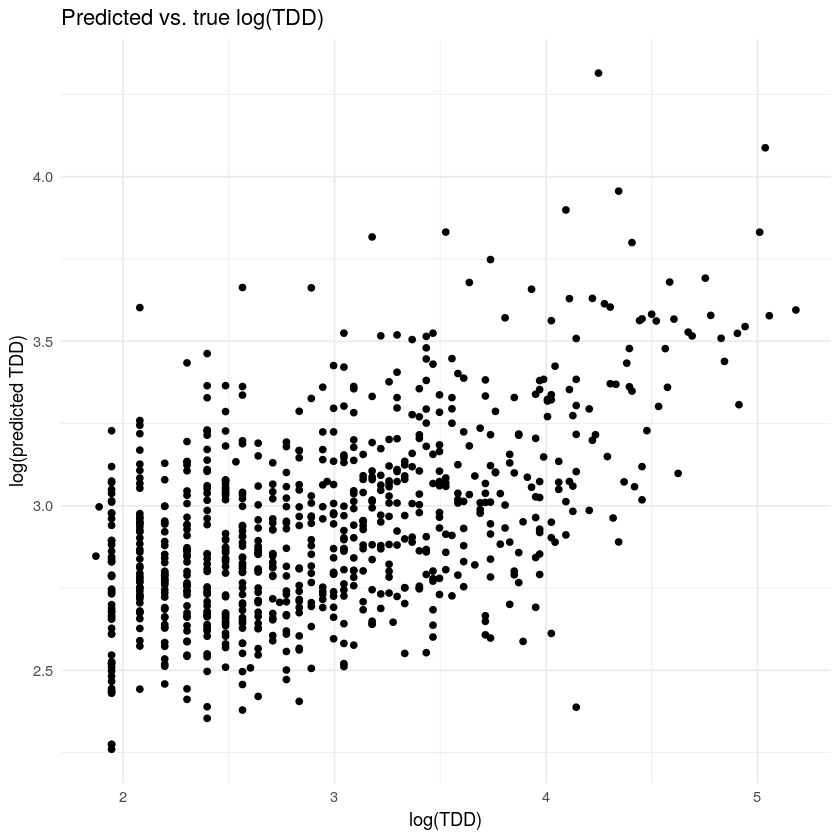

In [180]:
qplot(log(test[, 'TDD']), yglmnl) + theme_minimal() +  
    labs(x = "log(TDD)", y = "log(predicted TDD)", title = "Predicted vs. true log(TDD)")
# qplot(test[, 'TDD'], exp(yglmnl)) + theme_minimal()

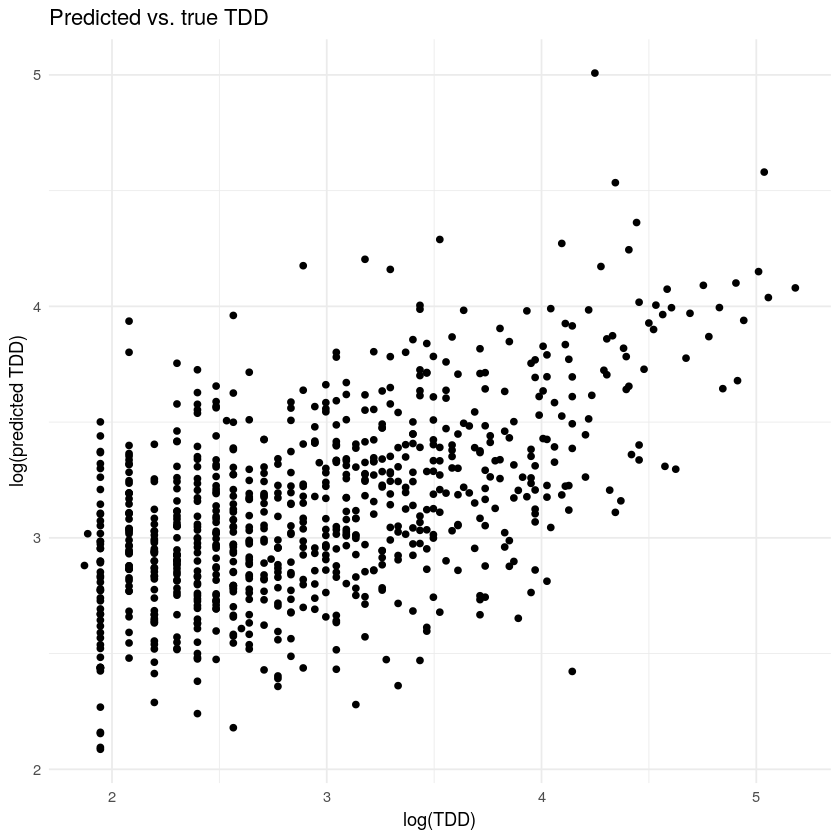

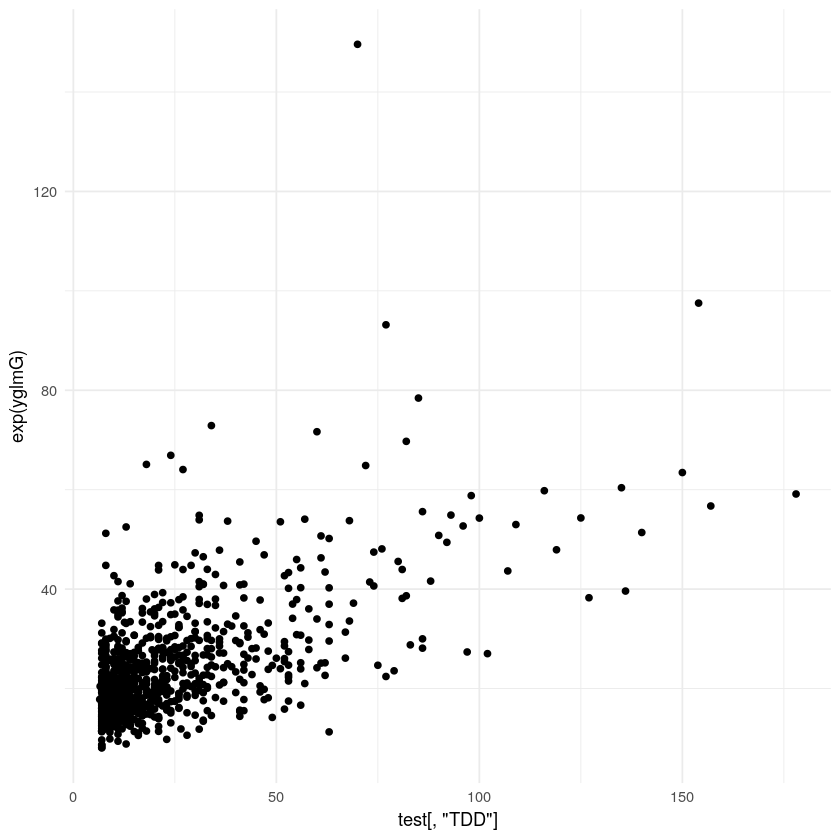

In [126]:
qplot(log(test[, 'TDD']), yglmG) + theme_minimal() +  labs(x = "log(TDD)", y = "log(predicted TDD)", title = "Predicted vs. true TDD")
qplot(test[, 'TDD'], exp(yglmG)) + theme_minimal()

In [119]:
dim(train)
colnames(train)
colnames(train[, 6:92])

[1] 2410   97

[1] "anon_id"                     "pat_enc_csn_id_coded"       
 [3] "inpatient_data_id_coded"     "patientDate"                
 [5] "TDD"                         "gender"                     
 [7] "age"                         "medis"                      
 [9] "Weight"                      "Height_i"                   
[11] "delta_H"                     "CR"                         
[13] "first_glu"                   "num_glu"                    
[15] "mean_glu"                    "median_glu"                 
[17] "min_glu"                     "max_glu"                    
[19] "sd_glu"                      "num_micro"                  
[21] "hxBasal"                     "totalSteroids"              
[23] "dx.AB"                       "dx.CD"                      
[25] "dx.E"                        "dx.F"                       
[27] "dx.G"                        "dx.H"                       
[29] "dx.I"                        "dx.J"                       
[31] "dx.K"                        "dx.L"                       
[33] "dx.M"                        "dx.N"                       
[35] "dx.O"                        "dx.P"                       
[37] "dx.Q"                        "dx.R"                       
[39] "dx.ST"                       "dx.U"                       
[41] "dx.VY"                       "dx.W"                       
[43] "dx.X"                        "dx.Z"                       
[45] "Albumin..Ser.Plas"           "Alk.P.TASE..Total..Ser.Plas"
[47] "ALT..SGPT...Ser.Plas"        "AnionGap"                   
[49] "AST..SGOT...Ser.Plas"        "BUN"                        
[51] "Calcium..Ser.Plas"           "Cl"                         
[53] "CO2..Ser.Plas"               "Cr"                         
[55] "Eos"                         "Glucose"                    
[57] "HCO3_a"                      "HCO3_v"                     
[59] "Hgb"                         "K"                          
[61] "Lactate"                     "Na"                         
[63] "Neut"                        "O2sat_a"                    
[65] "O2sat_v"                     "pCO2_a"                     
[67] "pCO2_v"                      "pH_a"                       
[69] "pH_v"                        "Platelet"                   
[71] "PO2_a"                       "PO2_v"                      
[73] "Protein..Total..Ser.Plas"    "TBili"                      
[75] "TCO2..v...ISTAT"             "TCO2_a"                     
[77] "Trop"                        "WBC"                        
[79] "diet.d1.npo"                 "diet.d2.others"             
[81] "diet.d3.carb"                "race.Asian"                 
[83] "race.Black"                  "race.Native.American"       
[85] "race.Other"                  "race.Pacific.Islander"      
[87] "race.Unknown"                "race.White"                 
[89] "a1c.high"                    "a1c.missing"                
[91] "a1c.normal"                  "a1c.panic.high"             
[93] "TDDhilo"                     "TDD3"                       
[95] "TDD4"                        "TDD3_650"                   
[97] "pred"

[1] "gender"                      "age"                        
 [3] "medis"                       "Weight"                     
 [5] "Height_i"                    "delta_H"                    
 [7] "CR"                          "first_glu"                  
 [9] "num_glu"                     "mean_glu"                   
[11] "median_glu"                  "min_glu"                    
[13] "max_glu"                     "sd_glu"                     
[15] "num_micro"                   "hxBasal"                    
[17] "totalSteroids"               "dx.AB"                      
[19] "dx.CD"                       "dx.E"                       
[21] "dx.F"                        "dx.G"                       
[23] "dx.H"                        "dx.I"                       
[25] "dx.J"                        "dx.K"                       
[27] "dx.L"                        "dx.M"                       
[29] "dx.N"                        "dx.O"                       
[31] "dx.P"                        "dx.Q"                       
[33] "dx.R"                        "dx.ST"                      
[35] "dx.U"                        "dx.VY"                      
[37] "dx.W"                        "dx.X"                       
[39] "dx.Z"                        "Albumin..Ser.Plas"          
[41] "Alk.P.TASE..Total..Ser.Plas" "ALT..SGPT...Ser.Plas"       
[43] "AnionGap"                    "AST..SGOT...Ser.Plas"       
[45] "BUN"                         "Calcium..Ser.Plas"          
[47] "Cl"                          "CO2..Ser.Plas"              
[49] "Cr"                          "Eos"                        
[51] "Glucose"                     "HCO3_a"                     
[53] "HCO3_v"                      "Hgb"                        
[55] "K"                           "Lactate"                    
[57] "Na"                          "Neut"                       
[59] "O2sat_a"                     "O2sat_v"                    
[61] "pCO2_a"                      "pCO2_v"                     
[63] "pH_a"                        "pH_v"                       
[65] "Platelet"                    "PO2_a"                      
[67] "PO2_v"                       "Protein..Total..Ser.Plas"   
[69] "TBili"                       "TCO2..v...ISTAT"            
[71] "TCO2_a"                      "Trop"                       
[73] "WBC"                         "diet.d1.npo"                
[75] "diet.d2.others"              "diet.d3.carb"               
[77] "race.Asian"                  "race.Black"                 
[79] "race.Native.American"        "race.Other"                 
[81] "race.Pacific.Islander"       "race.Unknown"               
[83] "race.White"                  "a1c.high"                   
[85] "a1c.missing"                 "a1c.normal"                 
[87] "a1c.panic.high"

In [ ]:
set.seed(123)
libs <- c("SL.glmnet", "SL.randomForest", "SL.gbm")

# Fit the CV.SuperLearner
system.time({
  cv_sl = CV.SuperLearner(Y = train[, "TDD"], X = train[, 6:92],
                          # For a real analysis we would use V = 10.
                          V = 10,
                          SL.library = libs)
})

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has

In [ ]:
save(cv_sl, file = "SLmodel_TDD-icu.RData")


Call:  
CV.SuperLearner(Y = train[, "TDD"], X = train[, 6:92], V = 3, SL.library = libs) 


Risk is based on: Mean Squared Error

All risk estimates are based on V =  3 

           Algorithm    Ave     se    Min    Max
       Super Learner 400.81 26.843 394.37 404.86
         Discrete SL 399.67 26.660 393.50 405.82
       SL.glmnet_All 402.65 26.785 393.50 414.76
 SL.randomForest_All 427.78 27.661 417.28 438.73
          SL.gbm_All 413.03 27.443 405.82 425.96

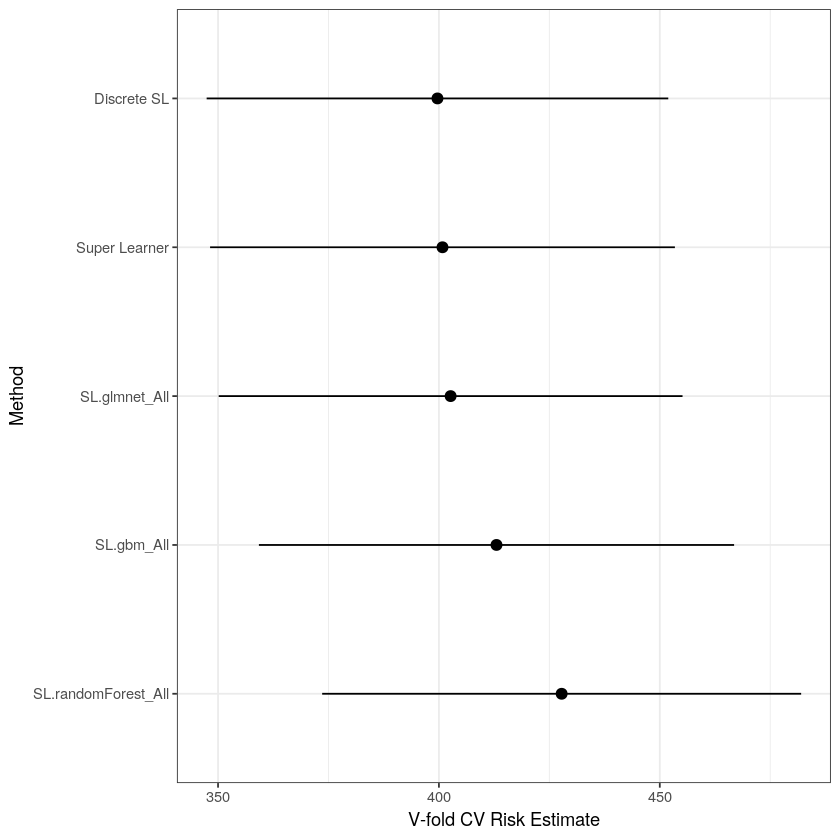

In [46]:
# SL with 3 folds show glmnet is the discrete SL
summary(cv_sl)
plot(cv_sl) + theme_bw()
# str(cv_sl)

In [40]:
fitcv = predict(cv_sl, test[, 6:92])
head(fitcv)

mape =  mean(abs(fitcv-data_6$TDD)/data_6$TDD)
mae =  mean(abs(fitcv-data_6$TDD))
print(mape)
print(mae)

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "CV.SuperLearner"


In [ ]:
set.seed(123)
libs <- c("SL.glmnet", "SL.randomForest", "SL.gbm")

# Fit the CV.SuperLearner
system.time({
  cv_sl = CV.SuperLearner(Y = log(train[, "TDD"]), X = train[, 6:92],
                          # For a real analysis we would use V = 10.
                          V = 10,
                          SL.library = libs)
})

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 35: dx.U has

In [192]:
dim(train)
dim(test)
length(train)

[1] 3178   97

[1] 793  97

[1] 97

In [199]:
# use glmnet for all vars and glm for W only
ci = function(dftr, dftest, ytrain, ytest, b=5){
    mapes = c()
    maes = c()
#     mapesW = c()
#     maesW = c()
    for (i in 1:b){
        idx = sample(1:nrow(dftr), nrow(dftr)*0.6, replace = TRUE)    
#         print(idx)
        dftrain = dftr[idx, ]
        glmnl <- cv.glmnet(x=as.matrix(dftrain[, 6:92]),y=ytrain)
        yglmnl <- predict(glmnl, newx=as.matrix(dftest[idx, 6:92]))[,1]
        mape =  mean(abs(exp(yglmnl) - ytest[idx])/ytest[idx])
        mae =  mean(abs(exp(yglmnl) - ytest[idx]))
        
#         glmlW <- glm(log(TDD) ~ Weight, data = dftrain[, 5:92])
#         yglmlW <- predict(glmlW, dftest[, 6:92])
#         mapeW =  mean(abs(exp(yglmlW) - ytest)/ytest)
#         maeW =  mean(abs(exp(yglmlW) - ytest))
        
#         mapesW[i] = mapeW
#         maesW[i] = maeW
        mapes[i] = mape
        maes[i] = mae
    }
#     print(quantile(mapesW, c(.025, .975)))
#     print(quantile(maesW, c(.025, .975)))
    print(quantile(mapes, c(.025, .975)))
    print(quantile(maes, c(.025, .975)))
}
ci(train, test, log(train$TDD), test$TDD)

ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : number of observations in y (3178) not equal to the number of rows of x (1906)


In [225]:
idx = sample(1:nrow(train), nrow(train)*0.6, replace = TRUE) 
head(idx)
length(idx)
train$TDD[idx]
# head(test[,idx])
# test$TDD

[1]  829  698 3082 1571 2812 1003

[1] 1906

[1]   8.00 125.00  20.00   8.00  20.00  48.00  30.00  10.00  27.00  14.00
  [11]  22.00   7.00  10.00  60.00  12.00  26.00   8.00  13.00  31.00  83.00
  [21]  11.00  13.00   7.00   8.00  26.00   8.00  30.00   8.00  43.00  37.00
  [31]  33.00  20.00  22.00  11.00  28.00  11.00  18.00  38.00   8.00   7.00
  [41]  17.00   7.00  29.00  50.00  26.00  18.00  25.00  14.00  19.00  16.00
  [51]  20.00   9.00  10.00  23.00  10.00  56.00  39.00  15.00   8.00  33.00
  [61]  20.00  16.00  34.00  61.00  48.00   9.00 116.00  17.00  12.00  21.00
  [71]  85.00   9.00   7.00  40.00  31.00  11.00  48.00   8.00  10.00   9.00
  [81]   7.00  41.00  15.00  98.00  12.00  17.00   8.00  16.30  16.00  11.00
  [91]  50.00  46.00  34.00  35.00  19.00  22.00  45.00   9.00 124.00  42.00
 [101]  16.00  14.00  20.00  12.00 109.00  33.00   7.00  35.00  12.00  13.00
 [111]  13.00  28.00  15.00  31.00  14.00  33.00  17.00  38.00  21.00  15.00
 [121]  27.00  12.00  53.00   8.00  33.00  18.00  12.00  24.00  14.00  27.00
 [131]  33.00  11.00  51.00   7.00  40.00  11.00  10.00   9.00  40.00  36.00
 [141]  75.00   8.50   9.00  15.00  24.00  10.00  21.00  18.00  51.00   9.00
 [151] 101.00  10.00  12.00   9.00  31.00  16.00  14.00  62.00  16.00  13.00
 [161]  10.00  31.00  46.00  36.00  13.00  22.00  13.00  10.00  16.00 102.00
 [171]  55.00   8.00 142.00  12.00  10.00  95.00   7.00  10.00  14.00  13.00
 [181]  63.00  10.00  17.00  51.00  10.00  42.00  53.00  12.00   7.00  12.00
 [191]  13.00  21.00  76.00  10.00   8.00  23.00  11.00   8.00  15.00   9.00
 [201]  14.00  42.00  10.00  22.00  28.00  10.00  11.00  18.00  35.00  38.00
 [211]  10.00  30.00  26.00  10.00  15.00  45.00   7.00  87.00   8.00  12.00
 [221]  17.00  10.00  44.00  75.00  12.00  74.00  40.00  43.00  53.00  30.00
 [231]  35.00  14.00   7.00  10.00  10.00 177.00  43.00   9.00  90.00  42.00
 [241]  50.00  16.00  31.00  32.00  16.00  19.00  13.00  27.00  10.00  33.00
 [251]   9.00  12.00  17.00  12.00  34.00  13.00   9.00  26.00   8.00  22.00
 [261]  24.00  40.00  20.00  15.00   9.00  37.00  21.00  21.00  68.00  24.00
 [271]  13.00  51.00  76.00  16.00  38.00   9.00  80.00  12.00  34.00  14.00
 [281]  41.00  56.00  21.10  14.00  10.00  37.00   7.00  38.00  37.00  60.00
 [291]  92.00  42.00   7.00  10.00  19.00  10.00  20.00  25.00  52.00  17.00
 [301]  13.00  14.00  26.00   9.00  26.00   7.00  62.00  16.00  26.00  19.00
 [311]  12.00   7.00  16.00  95.00  14.00  43.00  12.00   8.00   7.00  85.00
 [321]   8.00  33.00  10.00  15.00  23.00  21.00  40.00  50.00   8.00  29.00
 [331]  50.00  17.00  10.00  27.00  43.00  50.00  21.00  29.00  19.00  41.00
 [341]  17.00  30.00  48.00  11.00  22.00  27.00  91.00  21.00  32.00  10.00
 [351]  34.00  21.00   9.00  90.00  18.00  20.00  12.00  11.00  14.00   9.00
 [361]  19.00  33.00  39.00  42.00   8.00  15.00   8.00  21.00  11.00  23.00
 [371]  55.00  13.00   9.00  21.00  51.00   6.89   7.00  32.00   9.00  13.00
 [381]  85.00  13.00  12.00   8.00   7.00  24.00  30.00  26.00   8.00  10.00
 [391]  49.00  17.00   8.00  12.00  13.00  31.00  75.00  27.00  20.00  30.00
 [401]  24.00  32.00  22.00  13.00   7.00  14.00  18.00  30.00  13.00   7.00
 [411]  23.00   7.00  12.00  20.00  16.00  14.00  33.00  19.00  23.00  56.00
 [421]  22.00  14.00  20.00  24.00  95.00  69.00  13.00  73.00  10.00   9.00
 [431]  13.00  26.00  61.00  11.00  10.00  24.00   8.00  28.00  10.00  21.00
 [441]   9.00  37.00  14.00  26.00  29.00  25.00  25.00  26.00   8.00   8.00
 [451]  16.00  17.00  17.00 141.00   7.00  53.00  17.00  37.00  10.00  25.00
 [461]  79.00  22.00  38.00  45.00  14.00  14.00  60.00  67.00  16.00  11.00
 [471]  16.00  28.00  10.00  16.00  48.00   8.00  14.00  12.00  12.00  14.00
 [481]  13.00  13.00  24.00  25.00  33.00  51.00  29.00  19.00  12.00  10.00
 [491]  12.00  12.00   8.00  10.00  36.00   8.00  11.00  27.00   9.00  10.00
 [501]  32.00  11.00  27.00  23.00  10.00   7.00  35.00  13.00  73.00   7.00
 [511]  30.00   8.00  14.00   7.00  30.00  13.00  20.00  17.00  10.00  43.00

In [223]:
# library(boot)
boot(data=train, statistic=evalmpd, R=1000, test) 

Warning message in if (sim != "parametric") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (sim != "ordinary") m <- 0 else if (any(m < 0)) stop("negative value of 'm' supplied"):
“the condition has length > 1 and only the first element will be used”
Warning message in if (sim == "ordinary") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (sim == "balanced") indices <- balanced.array(n, R, strata) else if (sim == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (sim == "antithetic") indices <- antithetic.array(n, R, L, :
“the condition has length > 1 and only the first element will be used”
Warning message in if (sim == "permutation") indices <- permutation.array(n, R, :
“the condition has length > 1 and only the first element will be used”


ERROR: Error in dftest[, 6:92]: incorrect number of dimensions


In [219]:
head(train[, 6:92])
head(train$TDD)

,gender,age,medis,Weight,Height_i,delta_H,CR,first_glu,num_glu,mean_glu,⋯,race.Black,race.Native.American,race.Other,race.Pacific.Islander,race.Unknown,race.White,a1c.high,a1c.missing,a1c.normal,a1c.panic.high
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,55,1,72,160.00,1,0.45,192,1,192.0000,⋯,0,0,1,0,0,0,0,1,0,0
3,0,47,0,126,177.80,0,1.13,121,28,181.3214,⋯,0,0,1,0,0,0,0,1,0,0
4,0,76,0,130,182.88,0,1.29,125,75,165.1600,⋯,0,0,0,0,0,1,1,0,0,0
5,0,79,1,67,170.18,0,0.69,126,8,184.5000,⋯,0,0,0,0,0,1,0,1,0,0
7,0,55,1,150,193.04,0,1.77,132,38,162.3684,⋯,1,0,0,0,0,0,0,1,0,0
8,0,37,1,134,177.80,0,1.16,205,59,151.1017,⋯,0,0,0,0,0,1,0,1,0,0


[1]  9 47 32 17 23 22

In [245]:
evalmpd = function(df, b=500){
    mapes = c()
    maes = c()
    mapesW = c()
    maesW = c()
    for (i in 1:b){
        trainIndex <- createDataPartition(df$TDD, p = .8, list = FALSE, times = 1)
        train <- df[trainIndex,]
        test <- df[-trainIndex,]
        
        bidx = sample(1:nrow(train), nrow(train), replace = TRUE)    
#         glmnl <- cv.glmnet(x=as.matrix(train[bidx, 6:92]), y= log(train$TDD[bidx]))
#         yglmnl <- predict(glmnl, newx=as.matrix(test[, 6:92]))[,1]
#         mape =  mean(abs(exp(yglmnl) - test$TDD)/test$TDD)
#         mae =  mean(abs(exp(yglmnl) - test$TDD))
#         mapes[i] = mape
#         maes[i] = mae 
        
        glmlW <- glm(log(TDD) ~ Weight, data = train[bidx, 5:92])
        yglmlW <- predict(glmlW, test[, 6:92])
        mapeW =  mean(abs(exp(yglmlW) - test$TDD)/test$TDD)
        maeW =  mean(abs(exp(yglmlW) - test$TDD))
        
        mapesW[i] = mapeW
        maesW[i] = maeW

    }
    print(quantile(mapesW, c(.025, .975)))
    print(quantile(maesW, c(.025, .975)))
}

evalmpd(data_6)

     2.5%     97.5% 
0.5722468 0.6243363 
    2.5%    97.5% 
12.80769 14.46700 


In [169]:
ci.est = function(df, b=10000){
    mapes = c()
    maes = c()
    mapesW = c()
    maesW = c()
    for (i in 1:b){
#         print(i)
        idx = sample(1:length(df), length(df), replace = TRUE)
        dfs = df[idx, ]
#         print(head(idx))
        mapeW =  mean(abs(dfs$yhatW - dfs$y )/dfs$y)
        mape =  mean(abs(dfs$yhat - dfs$y )/dfs$y)

#         print(mape)
        maeW =  mean(abs(dfs$yhatW - dfs$y))    
        mae =  mean(abs(dfs$yhat - dfs$y))        

#         print(mae)
        mapesW[i] = mapeW
        maesW[i] = maeW
        mapes[i] = mape
        maes[i] = mae
    }
    print(quantile(mapesW, c(.025, .975)))
    print(quantile(maesW, c(.025, .975)))
    print(quantile(mapes, c(.025, .975)))
    print(quantile(maes, c(.025, .975)))
}
ci.est(dfest)

     2.5%     97.5% 
0.2280524 0.9186536 
      2.5%      97.5% 
  3.192733 163.520340 
     2.5%     97.5% 
0.2903123 0.7954128 
      2.5%      97.5% 
  3.333312 141.583479 


In [ ]:
n = length(dfn)
print(n)
nboot = 200
# Generate 200 bootstrap samples, i.e. an datasize x 200 array of
# random resamples from y.
tmpdata = sample(dfn, n*nboot, replace=TRUE)
bootstrapsample = matrix(tmpdata, nrow=datasize, ncol=nboot)

# Compute the means ybar*
ybarstar = colMeans(bootstrapsample)

# Find the 0.025 and 0.975 quantile for ybarstar
cibootstrap = quantile(ybarstar,c(0.025,0.975))
cat('Theoretical confidence interval: ',citheor,'\n')
cat('Bootstrap confidence interval: ',cibootstrap,'\n\n')

binwidth=.25/sqrt(datasize)
bins = seq(min(ybarstar)-binwidth,max(ybarstar)+binwidth,binwidth)
hist(ybarstar,freq=FALSE,bins)
x=seq(min(ybarstar)-.01,max(ybarstar)+.01,.001)
lines(x,dnorm(x,ybar,1/sqrt(datasize)),col="red")

# Example. Empirical bootstrap confidence interval for the mean.
# Data for the example in class24-prep
cat("Example. Empirical boostrap confidence interval for the mean.",'\n')
x = c(30,37,36,43,42,43,43,46,41,42)
n = length(x)
set.seed(1)  # for repeatability

# sample mean
xbar = mean(x)
cat("data mean = ",xbar,'\n')
nboot = 20
# Generate 20 bootstrap samples, i.e. an n x 20 array of
# random resamples from x.
tmpdata = sample(x,n*nboot, replace=TRUE)
bootstrapsample = matrix(tmpdata, nrow=n, ncol=nboot)

# Compute the means xbar*
xbarstar = colMeans(bootstrapsample)

# Compute delta* for each bootstrap sample
deltastar = xbarstar - xbar

# Find the 0.1 and 0.9 quantiles for deltastar
d = quantile(deltastar,c(0.1,0.9))

# Calculate the 80\% confidence interval for the mean.
ci = xbar - c(d[2],d[1])
cat('Bootstrap confidence interval: [',ci,']','\n')